# 1차적으로 크롤링한 블로그와 인스타그램 데이터에서, 
# 빈도가 높은 명사들 추출해 워드 클라우딩 진행

In [2]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
font_path = 'System/Library/Fonts/Supplemental/Arial Unicode.ttf'

In [3]:
from konlpy.tag import Okt
import pykospacing
import kss
import re

import pandas as pd

Metal device set to: Apple M2


# 네이버 블로그 키워드 : 인천+여행

In [4]:
blog = pd.read_csv('preprocessed_blog_keyword_incheon.csv')

In [5]:
pos_text=""

In [6]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [7]:
len(pos_text)

753494

# 명사 추출 후 빈도 수 확인

In [8]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출


systemMemory: 24.00 GB
maxCacheSize: 8.00 GB



In [9]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [249]:
len(myList_filter)

129281

In [10]:
nouns = ' '.join(myList_filter)

In [11]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [12]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [13]:
sorted_word_frequencies

[('호텔', 1715),
 ('공항', 1515),
 ('골프', 1254),
 ('여행', 1174),
 ('출발', 933),
 ('이용', 761),
 ('일본', 757),
 ('도착', 729),
 ('인천', 719),
 ('골프장', 702),
 ('코스', 640),
 ('이동', 622),
 ('터미널', 595),
 ('비행기', 591),
 ('포함', 582),
 ('항공', 581),
 ('체크', 530),
 ('조식', 473),
 ('탑승', 470),
 ('일정', 468),
 ('버스', 463),
 ('인천공항', 455),
 ('정도', 433),
 ('파리', 398),
 ('예약', 390),
 ('사람', 377),
 ('좌석', 377),
 ('석식', 361),
 ('온천', 358),
 ('카트', 358),
 ('출국', 337),
 ('한국', 332),
 ('플레이', 316),
 ('추가', 310),
 ('때문', 305),
 ('타고', 296),
 ('라운드', 296),
 ('생각', 293),
 ('리조트', 293),
 ('클럽', 288),
 ('투어', 285),
 ('위치', 277),
 ('사항', 277),
 ('리다', 276),
 ('국제공항', 276),
 ('자리', 259),
 ('보이', 258),
 ('상품', 255),
 ('소요', 251),
 ('만원', 249),
 ('차량', 249),
 ('사진', 244),
 ('대한항공', 244),
 ('숙소', 240),
 ('거리', 236),
 ('가능', 235),
 ('입국', 229),
 ('추천', 229),
 ('그린', 229),
 ('준비', 228),
 ('서비스', 226),
 ('확인', 225),
 ('정말', 225),
 ('경우', 223),
 ('구매', 219),
 ('수속', 218),
 ('안내', 217),
 ('식사', 215),
 ('진짜', 214),
 ('요금', 214),
 ('

In [17]:
incheon_words = sorted_word_frequencies

In [14]:
type(sorted_word_frequencies)

list

In [270]:
blog_incheon_travel_words=[]

In [271]:
for i in range(len(sorted_word_frequencies)):
    blog_incheon_travel_words.append(sorted_word_frequencies[i][0])

In [272]:
blog_incheon_travel_words

['호텔',
 '공항',
 '골프',
 '여행',
 '출발',
 '이용',
 '일본',
 '도착',
 '인천',
 '골프장',
 '코스',
 '이동',
 '터미널',
 '비행기',
 '포함',
 '항공',
 '체크',
 '조식',
 '탑승',
 '일정',
 '버스',
 '인천공항',
 '정도',
 '파리',
 '예약',
 '사람',
 '좌석',
 '석식',
 '온천',
 '카트',
 '출국',
 '한국',
 '플레이',
 '추가',
 '때문',
 '타고',
 '라운드',
 '생각',
 '리조트',
 '클럽',
 '투어',
 '위치',
 '사항',
 '리다',
 '국제공항',
 '자리',
 '보이',
 '상품',
 '소요',
 '만원',
 '차량',
 '사진',
 '대한항공',
 '숙소',
 '거리',
 '가능',
 '입국',
 '추천',
 '그린',
 '준비',
 '서비스',
 '확인',
 '정말',
 '경우',
 '구매',
 '수속',
 '안내',
 '식사',
 '진짜',
 '요금',
 '셀프',
 '비용',
 '라운지',
 '문의',
 '지다',
 '선택',
 '사용',
 '다시',
 '해외',
 '심사',
 '그냥',
 '가격',
 '라운딩',
 '중식',
 '부다페스트',
 '후기',
 '기준',
 '도심공항',
 '아침',
 '비행',
 '오늘',
 '관광',
 '가지',
 '후쿠오카',
 '항공사',
 '현지',
 '시마',
 '보고',
 '카드',
 '휴식',
 '송영',
 '택시',
 '시작',
 '이나',
 '캐디',
 '알다',
 '티켓',
 '직원',
 '유럽',
 '진행',
 '제공',
 '정보',
 '가고시마',
 '캐리어',
 '시험',
 '가장',
 '미리',
 '미야자키',
 '방법',
 '국제',
 '수화물',
 '참고',
 '환승',
 '날씨',
 '객실',
 '게이트',
 '위해',
 '무료',
 '처음',
 '아시아나',
 '시내',
 '링크',
 '마지막',
 '서울역',
 '개인',
 '모든',
 '느낌',
 '변경',


# 워드 클라우드

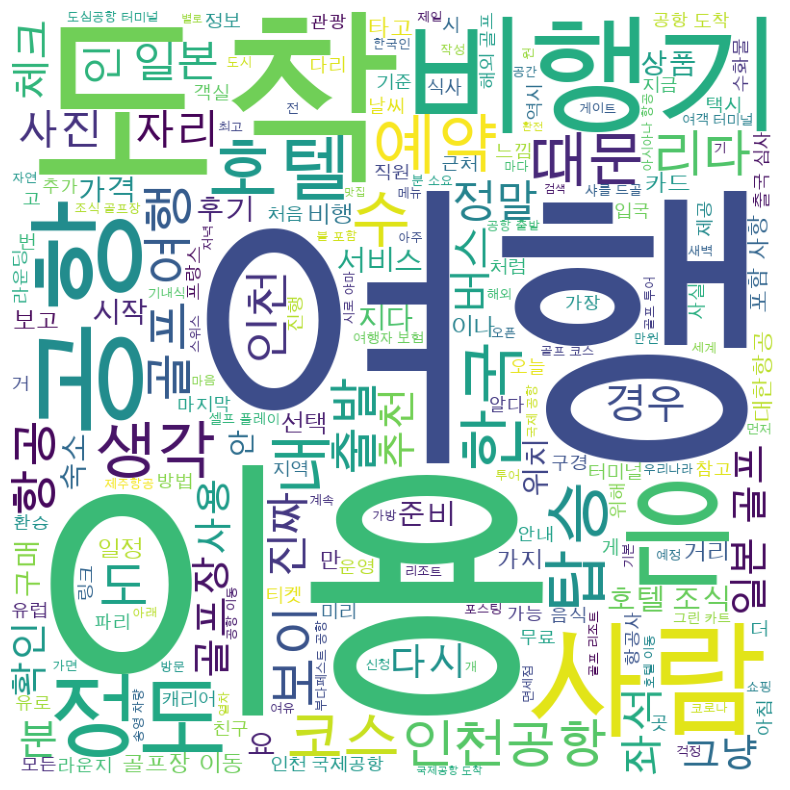

In [83]:
cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import TreebankWordTokenizer
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('preprocessed_blog_keyword_travel.csv')

In [3]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [4]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [5]:
result = model.transform(X)
print(result.shape)

(985, 20)


In [6]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [7]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('일본', 0.1267), ('베트남', 0.1215), ('호텔', 0.121), ('제주', 0.1179), ('투어', 0.1119)]
Topic 1: [('제주', 0.6995), ('제주도', 0.2464), ('수국', 0.1259), ('우도', 0.0846), ('해변', 0.0805)]
Topic 2: [('베트남', 0.4324), ('하노이', 0.3872), ('제주', 0.3398), ('투어', 0.1701), ('하롱베이', 0.1624)]
Topic 3: [('몽골', 0.847), ('사막', 0.1636), ('여행사', 0.1403), ('울란바토르', 0.1076), ('낙타', 0.082)]
Topic 4: [('제주', 0.2753), ('사용', 0.1868), ('챙기다', 0.1798), ('보험', 0.1769), ('준비물', 0.1529)]
Topic 5: [('일본', 0.537), ('몽골', 0.2993), ('후쿠오카', 0.2435), ('하노이', 0.1767), ('제주', 0.1746)]
Topic 6: [('유럽', 0.2284), ('투어', 0.1929), ('일본', 0.1764), ('세부', 0.1441), ('도시', 0.139)]
Topic 7: [('태국', 0.5458), ('방콕', 0.3663), ('파타야', 0.222), ('호텔', 0.1834), ('후쿠오카', 0.1239)]
Topic 8: [('하노이', 0.4711), ('태국', 0.2671), ('하롱베이', 0.226), ('방콕', 0.1896), ('손오공', 0.1847)]
Topic 9: [('세부', 0.4969), ('보라카이', 0.2547), ('투어', 0.2303), ('필리핀', 0.1973), ('호핑', 0.1612)]
Topic 10: [('유럽', 0.2637), ('파리', 0.1489), ('너무', 0.1432), ('숙소', 0.1289), ('패키지',

# 네이버 블로그 키워드 : 제주+여행

In [18]:
blog = pd.read_csv('preprocessed_blog_keyword_jeju.csv')

In [19]:
pos_text=""

In [20]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [277]:
len(pos_text)

744099

# 명사 추출 후 빈도 수 확인

In [21]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [22]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [280]:
len(myList_filter)

129493

In [23]:
nouns = ' '.join(myList_filter)

In [24]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [25]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [26]:
sorted_word_frequencies

[('제주', 1745),
 ('여행', 1072),
 ('제주도', 980),
 ('말고기', 629),
 ('카페', 539),
 ('예약', 463),
 ('사진', 458),
 ('공항', 415),
 ('낚시', 378),
 ('이용', 352),
 ('숙소', 346),
 ('정말', 343),
 ('호텔', 338),
 ('생각', 335),
 ('보이', 334),
 ('정도', 327),
 ('한국', 322),
 ('코스', 319),
 ('일정', 308),
 ('산업', 298),
 ('리다', 289),
 ('사람', 277),
 ('오늘', 275),
 ('체크', 270),
 ('도착', 263),
 ('자리', 259),
 ('연필', 258),
 ('추천', 256),
 ('특별자치도', 253),
 ('애월', 251),
 ('진짜', 247),
 ('항공', 246),
 ('체험', 240),
 ('맛집', 237),
 ('지다', 236),
 ('고기', 232),
 ('비행기', 230),
 ('출발', 230),
 ('네이버', 226),
 ('가격', 226),
 ('일본', 223),
 ('시작', 218),
 ('테마', 218),
 ('케이', 216),
 ('주식', 214),
 ('재료', 212),
 ('링크', 211),
 ('탑승', 207),
 ('때문', 203),
 ('위치', 203),
 ('기준', 201),
 ('바다', 199),
 ('상승', 199),
 ('스틸', 199),
 ('좌석', 194),
 ('바이오', 194),
 ('제주시', 192),
 ('골프', 192),
 ('터미널', 191),
 ('대비', 189),
 ('만원', 186),
 ('제주항공', 185),
 ('현대', 184),
 ('버스', 183),
 ('친구', 183),
 ('등급', 182),
 ('에스', 180),
 ('사용', 173),
 ('로봇', 172),
 ('방문', 170),
 ('구매'

In [27]:
jeju_words = sorted_word_frequencies

In [28]:
jeju_words

[('제주', 1745),
 ('여행', 1072),
 ('제주도', 980),
 ('말고기', 629),
 ('카페', 539),
 ('예약', 463),
 ('사진', 458),
 ('공항', 415),
 ('낚시', 378),
 ('이용', 352),
 ('숙소', 346),
 ('정말', 343),
 ('호텔', 338),
 ('생각', 335),
 ('보이', 334),
 ('정도', 327),
 ('한국', 322),
 ('코스', 319),
 ('일정', 308),
 ('산업', 298),
 ('리다', 289),
 ('사람', 277),
 ('오늘', 275),
 ('체크', 270),
 ('도착', 263),
 ('자리', 259),
 ('연필', 258),
 ('추천', 256),
 ('특별자치도', 253),
 ('애월', 251),
 ('진짜', 247),
 ('항공', 246),
 ('체험', 240),
 ('맛집', 237),
 ('지다', 236),
 ('고기', 232),
 ('비행기', 230),
 ('출발', 230),
 ('네이버', 226),
 ('가격', 226),
 ('일본', 223),
 ('시작', 218),
 ('테마', 218),
 ('케이', 216),
 ('주식', 214),
 ('재료', 212),
 ('링크', 211),
 ('탑승', 207),
 ('때문', 203),
 ('위치', 203),
 ('기준', 201),
 ('바다', 199),
 ('상승', 199),
 ('스틸', 199),
 ('좌석', 194),
 ('바이오', 194),
 ('제주시', 192),
 ('골프', 192),
 ('터미널', 191),
 ('대비', 189),
 ('만원', 186),
 ('제주항공', 185),
 ('현대', 184),
 ('버스', 183),
 ('친구', 183),
 ('등급', 182),
 ('에스', 180),
 ('사용', 173),
 ('로봇', 172),
 ('방문', 170),
 ('구매'

In [29]:
incheon_words

[('호텔', 1715),
 ('공항', 1515),
 ('골프', 1254),
 ('여행', 1174),
 ('출발', 933),
 ('이용', 761),
 ('일본', 757),
 ('도착', 729),
 ('인천', 719),
 ('골프장', 702),
 ('코스', 640),
 ('이동', 622),
 ('터미널', 595),
 ('비행기', 591),
 ('포함', 582),
 ('항공', 581),
 ('체크', 530),
 ('조식', 473),
 ('탑승', 470),
 ('일정', 468),
 ('버스', 463),
 ('인천공항', 455),
 ('정도', 433),
 ('파리', 398),
 ('예약', 390),
 ('사람', 377),
 ('좌석', 377),
 ('석식', 361),
 ('온천', 358),
 ('카트', 358),
 ('출국', 337),
 ('한국', 332),
 ('플레이', 316),
 ('추가', 310),
 ('때문', 305),
 ('타고', 296),
 ('라운드', 296),
 ('생각', 293),
 ('리조트', 293),
 ('클럽', 288),
 ('투어', 285),
 ('위치', 277),
 ('사항', 277),
 ('리다', 276),
 ('국제공항', 276),
 ('자리', 259),
 ('보이', 258),
 ('상품', 255),
 ('소요', 251),
 ('만원', 249),
 ('차량', 249),
 ('사진', 244),
 ('대한항공', 244),
 ('숙소', 240),
 ('거리', 236),
 ('가능', 235),
 ('입국', 229),
 ('추천', 229),
 ('그린', 229),
 ('준비', 228),
 ('서비스', 226),
 ('확인', 225),
 ('정말', 225),
 ('경우', 223),
 ('구매', 219),
 ('수속', 218),
 ('안내', 217),
 ('식사', 215),
 ('진짜', 214),
 ('요금', 214),
 ('

In [273]:
blog_jeju_travel_words=[]

In [285]:
for i in range(len(sorted_word_frequencies)):
    blog_jeju_travel_words.append(sorted_word_frequencies[i][0])

In [286]:
blog_jeju_travel_words

['제주',
 '여행',
 '제주도',
 '말고기',
 '카페',
 '예약',
 '사진',
 '공항',
 '낚시',
 '이용',
 '숙소',
 '정말',
 '호텔',
 '생각',
 '보이',
 '정도',
 '한국',
 '코스',
 '일정',
 '산업',
 '리다',
 '사람',
 '오늘',
 '체크',
 '도착',
 '자리',
 '연필',
 '추천',
 '특별자치도',
 '애월',
 '진짜',
 '항공',
 '체험',
 '맛집',
 '지다',
 '고기',
 '비행기',
 '출발',
 '네이버',
 '가격',
 '일본',
 '시작',
 '테마',
 '케이',
 '주식',
 '재료',
 '링크',
 '탑승',
 '때문',
 '위치',
 '기준',
 '바다',
 '상승',
 '스틸',
 '좌석',
 '바이오',
 '제주시',
 '골프',
 '터미널',
 '대비',
 '만원',
 '제주항공',
 '현대',
 '버스',
 '친구',
 '등급',
 '에스',
 '사용',
 '로봇',
 '방문',
 '구매',
 '느낌',
 '준비',
 '코로나',
 '정리',
 '뉴스',
 '가게',
 '보고',
 '중공업',
 '관련',
 '투자',
 '디저트',
 '서비스',
 '가지',
 '출국',
 '주요',
 '알다',
 '인천공항',
 '억원',
 '오픈',
 '다시',
 '하루',
 '처음',
 '테크',
 '후기',
 '에너지',
 '타고',
 '재생',
 '개발',
 '블로그',
 '정보',
 '지방',
 '마음',
 '거리',
 '가장',
 '아주',
 '마리',
 '가능',
 '투어',
 '건설',
 '심사',
 '아침',
 '충전',
 '기술',
 '정책',
 '애월더힐',
 '주문',
 '바위',
 '자연',
 '매매',
 '커피',
 '판매',
 '처럼',
 '추가',
 '사실',
 '러시아',
 '도심공항',
 '수속',
 '홀딩스',
 '메뉴',
 '부산',
 '오후',
 '그냥',
 '치료',
 '상장',
 '시스',
 '방콕',
 '운영',
 '진행',
 

# 워드 클라우드

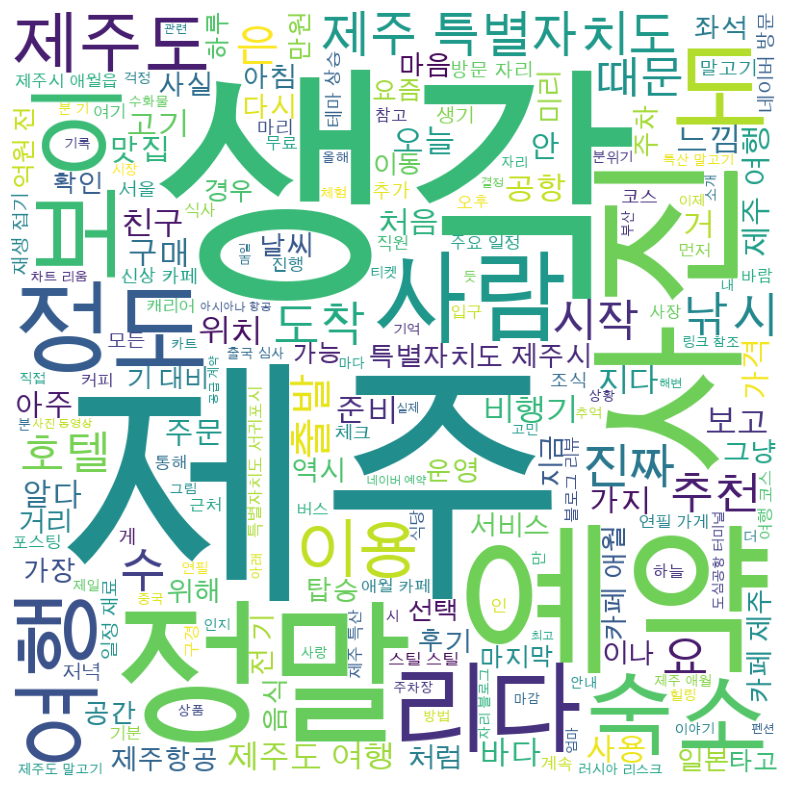

In [97]:
cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# 네이버 블로그 키워드 : 새만금

In [287]:
blog = pd.read_csv('preprocessed_blog_keyword_saemangeum.csv')

In [288]:
pos_text=""

In [289]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [290]:
len(pos_text)

1173258

# 명사 추출 후 빈도 수 확인

In [291]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [292]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [293]:
len(myList_filter)

221511

In [294]:
nouns = ' '.join(myList_filter)

In [295]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

sorted_word_frequencies

blog_sae_travel_words=[]

for i in range(len(sorted_word_frequencies)):
    blog_sae_travel_words.append(sorted_word_frequencies[i][0])

blog_sae_travel_wordsfrom collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [296]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [297]:
sorted_word_frequencies

[('새만금', 8673),
 ('세계', 2277),
 ('잼버리', 1624),
 ('군산', 1547),
 ('투자', 1507),
 ('사업', 1500),
 ('스카우트', 1490),
 ('기업', 1289),
 ('지역', 1260),
 ('산업', 1177),
 ('개발', 1145),
 ('도로', 1110),
 ('방조제', 812),
 ('행사', 801),
 ('체험', 791),
 ('대회', 774),
 ('위해', 758),
 ('계획', 757),
 ('전북', 752),
 ('전라북도', 737),
 ('공사', 696),
 ('이차전지', 686),
 ('개최', 658),
 ('리다', 638),
 ('부안', 637),
 ('청소년', 631),
 ('국가', 616),
 ('새만금개발청', 598),
 ('도시', 597),
 ('지원', 561),
 ('통해', 551),
 ('프로그램', 545),
 ('예정', 544),
 ('조성', 543),
 ('환경', 537),
 ('운영', 533),
 ('군산시', 529),
 ('진행', 507),
 ('여행', 498),
 ('추진', 488),
 ('참여', 478),
 ('바다', 465),
 ('활동', 464),
 ('건설', 463),
 ('현장', 458),
 ('방문', 457),
 ('사진', 442),
 ('문화', 441),
 ('보이', 439),
 ('유치', 437),
 ('준비', 426),
 ('센터', 425),
 ('시작', 423),
 ('남북', 421),
 ('지다', 411),
 ('부안군', 407),
 ('지정', 407),
 ('지구', 402),
 ('용지', 399),
 ('생태', 397),
 ('한국', 396),
 ('시설', 387),
 ('모습', 381),
 ('버스', 379),
 ('안전', 377),
 ('관광', 373),
 ('관련', 368),
 ('규모', 367),
 ('참가', 365),
 ('사

In [298]:
blog_sae_travel_words=[]

In [299]:
for i in range(len(sorted_word_frequencies)):
    blog_sae_travel_words.append(sorted_word_frequencies[i][0])

In [301]:
blog_sae_travel_words

['새만금',
 '세계',
 '잼버리',
 '군산',
 '투자',
 '사업',
 '스카우트',
 '기업',
 '지역',
 '산업',
 '개발',
 '도로',
 '방조제',
 '행사',
 '체험',
 '대회',
 '위해',
 '계획',
 '전북',
 '전라북도',
 '공사',
 '이차전지',
 '개최',
 '리다',
 '부안',
 '청소년',
 '국가',
 '새만금개발청',
 '도시',
 '지원',
 '통해',
 '프로그램',
 '예정',
 '조성',
 '환경',
 '운영',
 '군산시',
 '진행',
 '여행',
 '추진',
 '참여',
 '바다',
 '활동',
 '건설',
 '현장',
 '방문',
 '사진',
 '문화',
 '보이',
 '유치',
 '준비',
 '센터',
 '시작',
 '남북',
 '지다',
 '부안군',
 '지정',
 '지구',
 '용지',
 '생태',
 '한국',
 '시설',
 '모습',
 '버스',
 '안전',
 '관광',
 '관련',
 '규모',
 '참가',
 '사람',
 '대한',
 '기술',
 '스마트',
 '생각',
 '상황',
 '낚시',
 '정부',
 '홍보',
 '기간',
 '국제',
 '토지',
 '미래',
 '오늘',
 '간척',
 '공간',
 '선유도',
 '지난',
 '축제',
 '생산',
 '공항',
 '정도',
 '마련',
 '구축',
 '첨단',
 '진흥',
 '발전',
 '가장',
 '제공',
 '단계',
 '관리',
 '가지',
 '국내',
 '연결',
 '박물관',
 '코스',
 '설치',
 '위치',
 '개통',
 '이용',
 '때문',
 '교육',
 '현재',
 '공장',
 '항만',
 '경제',
 '최대',
 '이후',
 '소재',
 '핵심',
 '신시도',
 '사용',
 '관심',
 '대한민국',
 '메타',
 '에너지',
 '성공',
 '기관',
 '교통',
 '화단',
 '중심',
 '해수욕장',
 '점검',
 '자리',
 '활용',
 '기자',
 '정말',
 '부지',
 '보고',
 '장소',


# 워드 클라우드

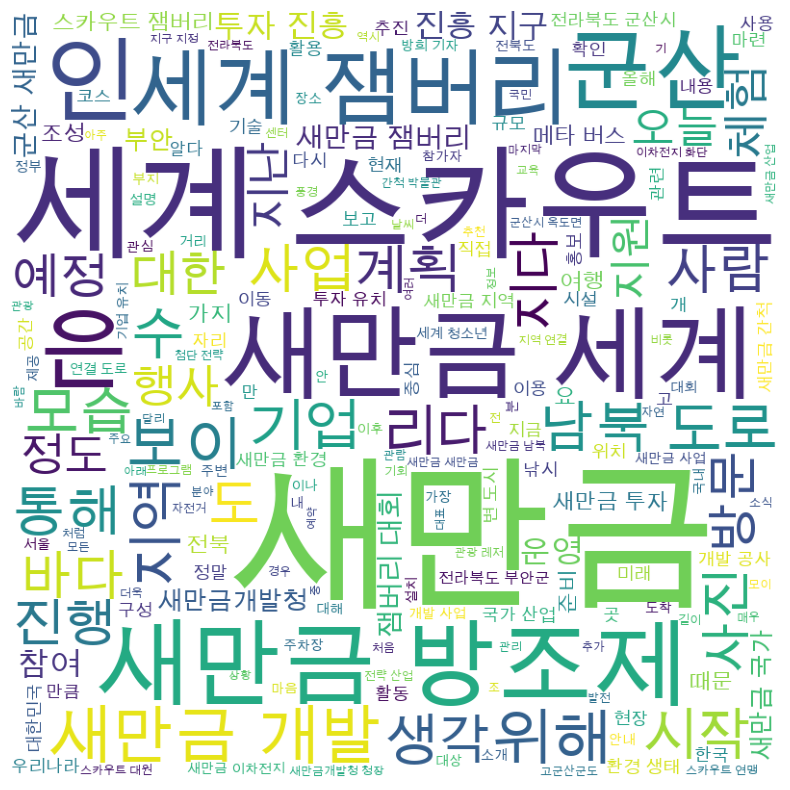

In [109]:
cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# 네이버 블로그 키워드 : 군산+여행

In [302]:
blog = pd.read_csv('preprocessed_blog_keyword_gunsan.csv')

In [303]:
pos_text=""

In [304]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [305]:
len(pos_text)

283835

# 명사 추출 후 빈도 수 확인

In [306]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [307]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [308]:
len(myList_filter)

43993

In [309]:
nouns = ' '.join(myList_filter)

In [310]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [311]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [312]:
sorted_word_frequencies

[('막걸리', 430),
 ('여행', 420),
 ('군산', 380),
 ('여의도', 290),
 ('진짜', 240),
 ('메뉴', 219),
 ('맛집', 210),
 ('딸기', 210),
 ('생각', 190),
 ('조장', 190),
 ('사진', 180),
 ('와인', 180),
 ('대게', 180),
 ('캠핑장', 170),
 ('거리', 160),
 ('도깨비', 160),
 ('살짝', 150),
 ('네이버', 150),
 ('튀김', 150),
 ('예약', 150),
 ('리다', 140),
 ('사람', 140),
 ('데이트', 140),
 ('오토', 140),
 ('보이', 130),
 ('오렌지', 130),
 ('도착', 130),
 ('숙소', 130),
 ('느낌', 130),
 ('맥주', 130),
 ('자연휴양림', 130),
 ('친구', 120),
 ('다시', 120),
 ('마지막', 120),
 ('진안', 120),
 ('해수욕장', 120),
 ('울산', 120),
 ('양양', 120),
 ('지다', 110),
 ('정도', 110),
 ('자리', 110),
 ('알다', 110),
 ('우주', 110),
 ('시작', 100),
 ('저녁', 100),
 ('보고', 100),
 ('카페', 100),
 ('세트', 100),
 ('분위기', 100),
 ('사실', 100),
 ('스케치', 100),
 ('추가', 100),
 ('짬뽕', 100),
 ('방문', 100),
 ('전라북도', 100),
 ('출발', 100),
 ('마을', 100),
 ('무주', 100),
 ('장수', 100),
 ('크림', 90),
 ('치즈', 90),
 ('바다', 90),
 ('안내', 90),
 ('성수', 90),
 ('수주', 90),
 ('지금', 90),
 ('남원', 90),
 ('부안', 90),
 ('선유도', 89),
 ('가족', 80),
 ('고창', 80),


In [313]:
blog_gunsan_travel_words=[]

In [314]:
for i in range(len(sorted_word_frequencies)):
    blog_gunsan_travel_words.append(sorted_word_frequencies[i][0])

In [315]:
blog_gunsan_travel_words

['막걸리',
 '여행',
 '군산',
 '여의도',
 '진짜',
 '메뉴',
 '맛집',
 '딸기',
 '생각',
 '조장',
 '사진',
 '와인',
 '대게',
 '캠핑장',
 '거리',
 '도깨비',
 '살짝',
 '네이버',
 '튀김',
 '예약',
 '리다',
 '사람',
 '데이트',
 '오토',
 '보이',
 '오렌지',
 '도착',
 '숙소',
 '느낌',
 '맥주',
 '자연휴양림',
 '친구',
 '다시',
 '마지막',
 '진안',
 '해수욕장',
 '울산',
 '양양',
 '지다',
 '정도',
 '자리',
 '알다',
 '우주',
 '시작',
 '저녁',
 '보고',
 '카페',
 '세트',
 '분위기',
 '사실',
 '스케치',
 '추가',
 '짬뽕',
 '방문',
 '전라북도',
 '출발',
 '마을',
 '무주',
 '장수',
 '크림',
 '치즈',
 '바다',
 '안내',
 '성수',
 '수주',
 '지금',
 '남원',
 '부안',
 '선유도',
 '가족',
 '고창',
 '남편',
 '근처',
 '위해',
 '보통',
 '감자',
 '정말',
 '커피',
 '오늘',
 '대표',
 '주문',
 '식당',
 '지역',
 '아침',
 '다리',
 '강원도',
 '그냥',
 '일본',
 '직접',
 '프리미엄',
 '실제',
 '유람선',
 '후기',
 '지도',
 '음식',
 '비상',
 '안쪽',
 '준비',
 '미트볼',
 '캠핑',
 '주스',
 '파크',
 '국립공원',
 '변산반도',
 '백합',
 '변산',
 '일몰',
 '완전',
 '타고',
 '먹기',
 '포스팅',
 '채색',
 '공원',
 '쨋날',
 '간짜장',
 '소스',
 '국물',
 '최고',
 '일정',
 '이동',
 '전북',
 '이용',
 '기차',
 '기억',
 '양조장',
 '매장',
 '칠리',
 '추천',
 '동기',
 '광주',
 '터미널',
 '정리',
 '엄마',
 '계속',
 '새만금',
 '가격',
 '역시',
 '서울',
 '

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [18]:
df = blog
#df = pd.read_csv('preprocessed_blog_all_keyword_5095.csv')

In [19]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [20]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [21]:
result = model.transform(X)
print(result.shape)

(130, 20)


In [22]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [23]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('짬뽕', 0.1706), ('진짜', 0.159), ('대게', 0.1324), ('숙소', 0.1276), ('오렌지', 0.1238)]
Topic 1: [('막걸리', 0.1926), ('캠핑장', 0.1882), ('터미널', 0.1682), ('오토', 0.155), ('자연휴양림', 0.144)]
Topic 2: [('스케치', 0.3242), ('채색', 0.2446), ('그리다', 0.2446), ('어반', 0.2038), ('초원', 0.1631)]
Topic 3: [('여의도', 0.3747), ('막걸리', 0.2535), ('와인', 0.2326), ('도깨비', 0.2067), ('데이트', 0.1809)]
Topic 4: [('캠핑장', 0.2943), ('막걸리', 0.2626), ('오토', 0.2424), ('자연휴양림', 0.2251), ('부안', 0.1558)]
Topic 5: [('막걸리', 0.4128), ('딸기', 0.2016), ('조장', 0.1824), ('오렌지', 0.1082), ('수주', 0.0864)]
Topic 6: [('막걸리', 0.302), ('터미널', 0.1671), ('딸기', 0.1475), ('국내선', 0.1392), ('방면', 0.1392)]
Topic 7: [('오렌지', 0.2978), ('백합', 0.1375), ('여의도', 0.115), ('엄마', 0.1146), ('일몰', 0.1038)]
Topic 8: [('막걸리', 0.1043), ('음악', 0.0989), ('오렌지', 0.094), ('아침', 0.0883), ('쨋날', 0.085)]
Topic 9: [('여의도', 0.1929), ('마을', 0.1381), ('광주', 0.1362), ('주차', 0.1283), ('와인', 0.1197)]
Topic 10: [('대게', 0.3521), ('우주', 0.2152), ('놀다', 0.1663), ('양양', 0.1591), ('강원

# 네이버 블로그 키워드 : 목포+여행

In [316]:
blog = pd.read_csv('preprocessed_blog_keyword_mokpo.csv')

In [317]:
pos_text=""

In [318]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [319]:
len(pos_text)

277465

# 명사 추출 후 빈도 수 확인

In [320]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [321]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [322]:
len(myList_filter)

43837

In [323]:
nouns = ' '.join(myList_filter)

In [324]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [325]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [326]:
sorted_word_frequencies

[('목포', 458),
 ('판촉', 370),
 ('아일랜드', 270),
 ('여행', 260),
 ('낚시', 260),
 ('숙소', 220),
 ('바위', 200),
 ('다시', 190),
 ('저녁', 190),
 ('서울', 180),
 ('부산', 180),
 ('기념품', 180),
 ('정말', 170),
 ('사진', 160),
 ('정도', 160),
 ('아침', 160),
 ('만원', 160),
 ('광주', 160),
 ('댄스', 160),
 ('리다', 150),
 ('하얏트', 150),
 ('그랜드', 150),
 ('선물', 150),
 ('오늘', 150),
 ('상품', 150),
 ('지다', 140),
 ('진짜', 140),
 ('신혼여행', 140),
 ('준비', 140),
 ('출발', 130),
 ('자리', 130),
 ('세르', 130),
 ('해상', 129),
 ('케이블카', 120),
 ('추천', 120),
 ('연필', 120),
 ('사우스', 120),
 ('링스', 120),
 ('영암', 120),
 ('포인트', 120),
 ('비용', 120),
 ('거도', 120),
 ('채비', 120),
 ('참돔', 120),
 ('모스크바', 120),
 ('박람회', 120),
 ('예약', 118),
 ('보이', 110),
 ('시작', 110),
 ('가거도', 110),
 ('오후', 100),
 ('계획', 100),
 ('결혼식', 100),
 ('부스', 100),
 ('웨딩', 100),
 ('답례', 100),
 ('재생', 99),
 ('축무', 92),
 ('결혼', 90),
 ('북항', 90),
 ('이용', 90),
 ('네이버', 90),
 ('주차장', 90),
 ('알다', 90),
 ('보고', 90),
 ('마지막', 90),
 ('호텔', 90),
 ('역시', 90),
 ('파사드', 90),
 ('슬라블', 90),
 ('전시회', 90),

In [327]:
blog_mokpo_travel_words=[]

In [328]:
for i in range(len(sorted_word_frequencies)):
    blog_mokpo_travel_words.append(sorted_word_frequencies[i][0])

In [329]:
blog_mokpo_travel_words

['목포',
 '판촉',
 '아일랜드',
 '여행',
 '낚시',
 '숙소',
 '바위',
 '다시',
 '저녁',
 '서울',
 '부산',
 '기념품',
 '정말',
 '사진',
 '정도',
 '아침',
 '만원',
 '광주',
 '댄스',
 '리다',
 '하얏트',
 '그랜드',
 '선물',
 '오늘',
 '상품',
 '지다',
 '진짜',
 '신혼여행',
 '준비',
 '출발',
 '자리',
 '세르',
 '해상',
 '케이블카',
 '추천',
 '연필',
 '사우스',
 '링스',
 '영암',
 '포인트',
 '비용',
 '거도',
 '채비',
 '참돔',
 '모스크바',
 '박람회',
 '예약',
 '보이',
 '시작',
 '가거도',
 '오후',
 '계획',
 '결혼식',
 '부스',
 '웨딩',
 '답례',
 '재생',
 '축무',
 '결혼',
 '북항',
 '이용',
 '네이버',
 '주차장',
 '알다',
 '보고',
 '마지막',
 '호텔',
 '역시',
 '파사드',
 '슬라블',
 '전시회',
 '관람',
 '신랑',
 '샤프',
 '기프트',
 '카페',
 '날씨',
 '포스팅',
 '주문',
 '도착',
 '사람',
 '사장',
 '바람',
 '가지',
 '정보',
 '선장',
 '사은',
 '전라남도',
 '할인',
 '무료',
 '유달산',
 '선택',
 '느낌',
 '그냥',
 '화장실',
 '정리',
 '성당',
 '신부',
 '영상',
 '골프',
 '달리',
 '때문',
 '오션',
 '생각',
 '신청',
 '좌석',
 '음식',
 '점심',
 '식사',
 '벡스코',
 '전시장',
 '전시',
 '축하',
 '푸랭',
 '볼펜',
 '온스',
 '사용',
 '빌라',
 '스테이션',
 '고하도',
 '탑승',
 '내부',
 '모든',
 '위해',
 '지역',
 '군산',
 '기억',
 '수채화',
 '해도',
 '아주',
 '가장',
 '지금',
 '거제',
 '입구',
 '방향',
 '이름',
 '돌돔',
 '래미',


# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [35]:
df = blog
#df = pd.read_csv('preprocessed_blog_all_keyword_5095.csv')

In [36]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [37]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [38]:
result = model.transform(X)
print(result.shape)

(150, 20)


In [39]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [40]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('아일랜드', 0.194), ('낚시', 0.1842), ('숙소', 0.1426), ('너무', 0.1145), ('참돔', 0.1086)]
Topic 1: [('낚시', 0.2597), ('아일랜드', 0.2427), ('참돔', 0.1619), ('채비', 0.1344), ('푸랭', 0.1209)]
Topic 2: [('정보', 0.205), ('터미널', 0.1604), ('좌석', 0.1577), ('방면', 0.1337), ('국내선', 0.1337)]
Topic 3: [('판촉', 0.3385), ('수채화', 0.2618), ('그림', 0.2182), ('드로잉', 0.1745), ('일로', 0.1745)]
Topic 4: [('댄스', 0.2238), ('온스', 0.1474), ('웨딩', 0.1399), ('축무', 0.1286), ('신랑', 0.1259)]
Topic 5: [('댄스', 0.2172), ('그랜드', 0.178), ('하얏트', 0.178), ('서울', 0.1514), ('영암', 0.1424)]
Topic 6: [('부산', 0.2227), ('부스', 0.2137), ('박람회', 0.2137), ('판촉', 0.2127), ('관람', 0.1923)]
Topic 7: [('판촉', 0.4631), ('상품', 0.1878), ('기념품', 0.1698), ('하얏트', 0.1584), ('그랜드', 0.1584)]
Topic 8: [('댄스', 0.2733), ('웨딩', 0.1708), ('축무', 0.1571), ('신랑', 0.1537), ('축하', 0.1196)]
Topic 9: [('세르', 0.2906), ('모스크바', 0.2682), ('슬라블', 0.2012), ('파사드', 0.2012), ('수도원', 0.1341)]
Topic 10: [('댄스', 0.1871), ('군산', 0.179), ('짬뽕', 0.176), ('가기', 0.132), ('진짜', 0.125)

# 네이버 블로그 키워드 : 서산+여행

In [330]:
blog = pd.read_csv('preprocessed_blog_keyword_seosan.csv')

In [331]:
pos_text=""

In [332]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [333]:
len(pos_text)

160443

# 명사 추출 후 빈도 수 확인

In [334]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [335]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [336]:
len(myList_filter)

29896

In [337]:
nouns = ' '.join(myList_filter)

In [338]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [339]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [340]:
sorted_word_frequencies

[('펜션', 679),
 ('비치', 529),
 ('서산', 336),
 ('네이버', 330),
 ('태안', 310),
 ('어나더', 279),
 ('출처', 250),
 ('골프', 190),
 ('관리', 180),
 ('오션', 160),
 ('조개', 160),
 ('속눈썹', 158),
 ('루비', 152),
 ('밸리', 150),
 ('체험', 139),
 ('갯벌', 132),
 ('손님', 129),
 ('여행', 120),
 ('사랑', 120),
 ('예약', 120),
 ('행복', 120),
 ('한국', 110),
 ('업무', 110),
 ('뉴스', 110),
 ('출발', 110),
 ('레이크', 110),
 ('안면도', 110),
 ('사람', 100),
 ('지원', 100),
 ('경제', 90),
 ('하루', 90),
 ('호텔', 90),
 ('스톤', 90),
 ('바다', 90),
 ('조명', 90),
 ('추천', 80),
 ('사항', 80),
 ('이란', 80),
 ('리조트', 80),
 ('세인트', 80),
 ('생각', 80),
 ('모델링', 80),
 ('엄마', 80),
 ('위안', 80),
 ('유지', 70),
 ('터미널', 70),
 ('확인', 70),
 ('외부', 70),
 ('경우', 70),
 ('방법', 70),
 ('안내', 70),
 ('직무', 70),
 ('오늘', 70),
 ('세월', 70),
 ('카트', 70),
 ('스카이', 70),
 ('중국', 70),
 ('바베큐', 70),
 ('청도', 70),
 ('연장', 68),
 ('재생', 68),
 ('피크닉', 60),
 ('수영장', 60),
 ('생산', 60),
 ('가지', 60),
 ('공항', 60),
 ('캐디', 60),
 ('파타야', 60),
 ('사이드', 60),
 ('우드', 60),
 ('클럽', 60),
 ('베이', 60),
 ('힐스', 60),
 ('설날',

In [341]:
blog_seosan_travel_words=[]

In [342]:
for i in range(len(sorted_word_frequencies)):
    blog_seosan_travel_words.append(sorted_word_frequencies[i][0])

In [343]:
blog_seosan_travel_words

['펜션',
 '비치',
 '서산',
 '네이버',
 '태안',
 '어나더',
 '출처',
 '골프',
 '관리',
 '오션',
 '조개',
 '속눈썹',
 '루비',
 '밸리',
 '체험',
 '갯벌',
 '손님',
 '여행',
 '사랑',
 '예약',
 '행복',
 '한국',
 '업무',
 '뉴스',
 '출발',
 '레이크',
 '안면도',
 '사람',
 '지원',
 '경제',
 '하루',
 '호텔',
 '스톤',
 '바다',
 '조명',
 '추천',
 '사항',
 '이란',
 '리조트',
 '세인트',
 '생각',
 '모델링',
 '엄마',
 '위안',
 '유지',
 '터미널',
 '확인',
 '외부',
 '경우',
 '방법',
 '안내',
 '직무',
 '오늘',
 '세월',
 '카트',
 '스카이',
 '중국',
 '바베큐',
 '청도',
 '연장',
 '재생',
 '피크닉',
 '수영장',
 '생산',
 '가지',
 '공항',
 '캐디',
 '파타야',
 '사이드',
 '우드',
 '클럽',
 '베이',
 '힐스',
 '설날',
 '건물',
 '바닷가',
 '앞바다',
 '이야기',
 '지역',
 '방문',
 '출입',
 '문의',
 '채팅',
 '시술',
 '문자',
 '진행',
 '관련',
 '공장',
 '어제',
 '포함',
 '석식',
 '중식',
 '클락',
 '부리',
 '파이',
 '스프링',
 '거제',
 '경주',
 '마린',
 '로얄',
 '국내선',
 '방면',
 '주차장',
 '모습',
 '신규',
 '불빛',
 '해감']

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [52]:
df = blog
#df = pd.read_csv('preprocessed_blog_all_keyword_5095.csv')

In [53]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [54]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [55]:
result = model.transform(X)
print(result.shape)

(80, 20)


In [56]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [57]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('골프', 0.2605), ('레이크', 0.1801), ('위안', 0.1641), ('오션', 0.1569), ('리조트', 0.1499)]
Topic 1: [('펜션', 0.3007), ('피크닉', 0.1764), ('네이버', 0.1706), ('많다', 0.1701), ('출처', 0.1647)]
Topic 2: [('속눈썹', 0.5249), ('연장', 0.2258), ('펜션', 0.2039), ('시술', 0.1662), ('자연', 0.1295)]
Topic 3: [('출처', 0.4642), ('네이버', 0.3663), ('뉴스', 0.2043), ('경제', 0.1671), ('세월', 0.13)]
Topic 4: [('속눈썹', 0.4041), ('업무', 0.2686), ('관리', 0.2252), ('지원', 0.1763), ('연장', 0.1738)]
Topic 5: [('펜션', 0.5865), ('어나더', 0.1719), ('비치', 0.1634), ('태안', 0.1388), ('조개', 0.1373)]
Topic 6: [('피크닉', 0.2533), ('출입', 0.2111), ('지역', 0.1689), ('명소', 0.1689), ('사실', 0.1689)]
Topic 7: [('위안', 0.3433), ('청도', 0.3003), ('대한항공', 0.1716), ('중국', 0.1534), ('카트', 0.1534)]
Topic 8: [('글루', 0.4175), ('안나', 0.4175), ('분들', 0.2794), ('드리다', 0.2017), ('시술', 0.0839)]
Topic 9: [('성공', 0.3439), ('자연', 0.3343), ('스럽게', 0.3339), ('펴다', 0.2668), ('접기', 0.2668)]
Topic 10: [('더비', 0.2328), ('해안', 0.2328), ('코로', 0.2328), ('아담', 0.2328), ('스티', 0.2328)

# 네이버 블로그 키워드 : 태안+여행

In [344]:
blog = pd.read_csv('preprocessed_blog_keyword_taean.csv')

In [345]:
pos_text=""

In [346]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [347]:
len(pos_text)

130042

# 명사 추출 후 빈도 수 확인

In [348]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [349]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [350]:
len(myList_filter)

21365

In [351]:
nouns = ' '.join(myList_filter)

In [352]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [353]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [354]:
sorted_word_frequencies

[('펜션', 663),
 ('태안', 470),
 ('비치', 359),
 ('어나더', 270),
 ('튤립', 240),
 ('서산', 184),
 ('조개', 158),
 ('속눈썹', 157),
 ('꽃게', 156),
 ('체험', 154),
 ('루비', 151),
 ('생생', 146),
 ('추천', 146),
 ('서울', 140),
 ('갯벌', 135),
 ('안면도', 130),
 ('손님', 130),
 ('여행', 120),
 ('예약', 119),
 ('바다', 119),
 ('사랑', 110),
 ('서울숲', 110),
 ('행복', 100),
 ('간장게장', 96),
 ('사람', 90),
 ('정보', 90),
 ('생각', 90),
 ('조명', 90),
 ('생태', 90),
 ('방법', 88),
 ('엄마', 80),
 ('학꽁치', 80),
 ('재생', 79),
 ('모델링', 76),
 ('바베큐', 70),
 ('주차장', 70),
 ('안산', 70),
 ('허브', 70),
 ('평택', 70),
 ('농업', 70),
 ('안내', 68),
 ('연장', 67),
 ('맛집', 66),
 ('이야기', 66),
 ('방문', 60),
 ('주차', 60),
 ('거리', 60),
 ('튀김', 60),
 ('추억', 60),
 ('건물', 60),
 ('수영장', 60),
 ('보이', 60),
 ('낚시', 60),
 ('벚꽃', 60),
 ('무료', 60),
 ('세계', 60),
 ('터미널', 60),
 ('지다', 59),
 ('자연', 59),
 ('바닷가', 58),
 ('설날', 56),
 ('앞바다', 54),
 ('공간', 50),
 ('메뉴', 50),
 ('소개', 50),
 ('네이버', 50),
 ('사진', 50),
 ('하루', 50),
 ('모습', 50),
 ('신규', 50),
 ('문자', 50),
 ('해수욕장', 50),
 ('불빛', 50),
 ('출발', 50

In [355]:
blog_taean_travel_words=[]

In [356]:
for i in range(len(sorted_word_frequencies)):
    blog_taean_travel_words.append(sorted_word_frequencies[i][0])

In [357]:
blog_taean_travel_words

['펜션',
 '태안',
 '비치',
 '어나더',
 '튤립',
 '서산',
 '조개',
 '속눈썹',
 '꽃게',
 '체험',
 '루비',
 '생생',
 '추천',
 '서울',
 '갯벌',
 '안면도',
 '손님',
 '여행',
 '예약',
 '바다',
 '사랑',
 '서울숲',
 '행복',
 '간장게장',
 '사람',
 '정보',
 '생각',
 '조명',
 '생태',
 '방법',
 '엄마',
 '학꽁치',
 '재생',
 '모델링',
 '바베큐',
 '주차장',
 '안산',
 '허브',
 '평택',
 '농업',
 '안내',
 '연장',
 '맛집',
 '이야기',
 '방문',
 '주차',
 '거리',
 '튀김',
 '추억',
 '건물',
 '수영장',
 '보이',
 '낚시',
 '벚꽃',
 '무료',
 '세계',
 '터미널',
 '지다',
 '자연',
 '바닷가',
 '설날',
 '앞바다',
 '공간',
 '메뉴',
 '소개',
 '네이버',
 '사진',
 '하루',
 '모습',
 '신규',
 '문자',
 '해수욕장',
 '불빛',
 '출발',
 '명소',
 '어린이날',
 '위치',
 '텐트',
 '시술',
 '국내선',
 '방면']

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [69]:
df = blog
#df = pd.read_csv('preprocessed_blog_all_keyword_5095.csv')

In [70]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [71]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [72]:
result = model.transform(X)
print(result.shape)

(60, 20)


In [73]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [74]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('펜션', 0.3298), ('튤립', 0.2641), ('꽃게', 0.1951), ('생생', 0.1826), ('속눈썹', 0.1714)]
Topic 1: [('낚시', 0.3173), ('학꽁치', 0.3173), ('펜션', 0.1693), ('봉돌', 0.1586), ('바늘', 0.1586)]
Topic 2: [('속눈썹', 0.2129), ('학꽁치', 0.205), ('낚시', 0.205), ('터미널', 0.1666), ('서산', 0.1532)]
Topic 3: [('속눈썹', 0.5068), ('서산', 0.3114), ('연장', 0.2161), ('시술', 0.1615), ('예약', 0.1012)]
Topic 4: [('펜션', 0.5193), ('비치', 0.2234), ('어나더', 0.1533), ('조개', 0.1236), ('루비', 0.1194)]
Topic 5: [('꽃게', 0.3), ('생생', 0.2807), ('간장게장', 0.1843), ('먹다', 0.1695), ('맛집', 0.1264)]
Topic 6: [('루비', 0.191), ('손님', 0.1623), ('태안펜션', 0.1545), ('보이지', 0.1388), ('행복하다', 0.134)]
Topic 7: [('보이지', 0.2139), ('앞바다', 0.1906), ('펜션', 0.1863), ('먹다', 0.1735), ('어나더비치', 0.1292)]
Topic 8: [('글루', 0.4476), ('안나', 0.4476), ('분들', 0.1254), ('시술', 0.1021), ('펜션', 0.0769)]
Topic 9: [('분들', 0.4008), ('서산', 0.1017), ('나다', 0.0897), ('속눈썹', 0.0841), ('연장', 0.0818)]
Topic 10: [('꽃지', 0.694), ('펜션', 0.0003), ('먹다', 0.0003), ('속눈썹', 0.0002), ('서산', 0.000

# 네이버 블로그 키워드 : 여행

In [358]:
blog = pd.read_csv('preprocessed_blog_keyword_travel.csv')

In [359]:
pos_text=""

In [360]:
for _, row in blog.iterrows():
    pos_text += row['preprocessed_content']

In [361]:
len(pos_text)

1741590

# 명사 추출 후 빈도 수 확인

In [362]:
okt = Okt()
myList = okt.pos(pos_text, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Noun']] # 추출된 값 중 명사만 추출

In [363]:
for i in myList_filter:
    if len(i) <2:
        myList_filter.remove(i)

In [364]:
len(myList_filter)

285553

In [365]:
nouns = ' '.join(myList_filter)

In [366]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = nouns

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=50}
word_frequencies = {key: value for key, value in word_frequencies.items() if len(key) >=2}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [367]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [368]:
sorted_word_frequencies

[('여행', 10523),
 ('투어', 1401),
 ('사진', 1396),
 ('호텔', 1243),
 ('생각', 1156),
 ('일정', 1032),
 ('정도', 1031),
 ('숙소', 981),
 ('예약', 975),
 ('일본', 957),
 ('베트남', 931),
 ('사람', 929),
 ('이용', 916),
 ('준비', 905),
 ('때문', 903),
 ('정말', 872),
 ('추천', 868),
 ('코스', 839),
 ('카페', 829),
 ('보이', 743),
 ('사용', 737),
 ('제주', 724),
 ('가족', 702),
 ('여름', 676),
 ('공항', 670),
 ('가장', 660),
 ('유럽', 616),
 ('지다', 614),
 ('방문', 611),
 ('이나', 606),
 ('맛집', 597),
 ('이동', 597),
 ('도착', 593),
 ('보고', 591),
 ('한국', 586),
 ('날씨', 583),
 ('바다', 582),
 ('패키지', 577),
 ('다시', 563),
 ('자유여행', 553),
 ('계획', 546),
 ('가지', 545),
 ('가격', 538),
 ('느낌', 537),
 ('리다', 534),
 ('시작', 533),
 ('마음', 518),
 ('음식', 515),
 ('타고', 512),
 ('거리', 511),
 ('알다', 494),
 ('구경', 491),
 ('처음', 483),
 ('친구', 483),
 ('마을', 476),
 ('해외여행', 475),
 ('도시', 468),
 ('관광', 465),
 ('진짜', 461),
 ('하노이', 443),
 ('선택', 442),
 ('재생', 442),
 ('경우', 437),
 ('처럼', 433),
 ('오늘', 428),
 ('저녁', 426),
 ('위치', 425),
 ('식사', 424),
 ('태국', 420),
 ('여행지', 419),
 ('풍

In [369]:
blog_travel_words=[]

In [370]:
for i in range(len(sorted_word_frequencies)):
    blog_travel_words.append(sorted_word_frequencies[i][0])

In [371]:
blog_travel_words

['여행',
 '투어',
 '사진',
 '호텔',
 '생각',
 '일정',
 '정도',
 '숙소',
 '예약',
 '일본',
 '베트남',
 '사람',
 '이용',
 '준비',
 '때문',
 '정말',
 '추천',
 '코스',
 '카페',
 '보이',
 '사용',
 '제주',
 '가족',
 '여름',
 '공항',
 '가장',
 '유럽',
 '지다',
 '방문',
 '이나',
 '맛집',
 '이동',
 '도착',
 '보고',
 '한국',
 '날씨',
 '바다',
 '패키지',
 '다시',
 '자유여행',
 '계획',
 '가지',
 '가격',
 '느낌',
 '리다',
 '시작',
 '마음',
 '음식',
 '타고',
 '거리',
 '알다',
 '구경',
 '처음',
 '친구',
 '마을',
 '해외여행',
 '도시',
 '관광',
 '진짜',
 '하노이',
 '선택',
 '재생',
 '경우',
 '처럼',
 '오늘',
 '저녁',
 '위치',
 '식사',
 '태국',
 '여행지',
 '풍경',
 '미리',
 '휴가',
 '현지',
 '버스',
 '출발',
 '해변',
 '체험',
 '아침',
 '마지막',
 '하루',
 '몽골',
 '제주도',
 '지역',
 '정보',
 '사실',
 '모습',
 '할인',
 '커피',
 '후기',
 '소개',
 '식당',
 '위해',
 '리조트',
 '쇼핑',
 '참고',
 '아주',
 '그냥',
 '역시',
 '여러',
 '준비물',
 '다낭',
 '항공권',
 '마사지',
 '구매',
 '필수',
 '지금',
 '진행',
 '장소',
 '만원',
 '세부',
 '주문',
 '부산',
 '비행기',
 '공원',
 '포함',
 '이야기',
 '해외',
 '세계',
 '자리',
 '방법',
 '공간',
 '확인',
 '미국',
 '요즘',
 '분위기',
 '마다',
 '여행자',
 '차량',
 '가이드',
 '라면',
 '아래',
 '가면',
 '근처',
 '만큼',
 '무료',
 '나트랑',
 '통해',
 '자연',
 '메뉴',


# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(nouns)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# LSA

In [86]:
df = blog
#df = pd.read_csv('preprocessed_blog_all_keyword_5095.csv')

In [87]:
vectorizer = TfidfVectorizer( max_features=2000, max_df=0.5, smooth_idf=True) # 상위 2000개의 단어에 대해서만
X = vectorizer.fit_transform(df['preprocessed_content'])

In [88]:
model = TruncatedSVD(n_components=20, n_iter=100, random_state=42) # n_components: topic 수
model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=42)

In [89]:
result = model.transform(X)
print(result.shape)

(985, 20)


In [90]:
def get_keyword_by_topic(components, feature_name, n=5):
    for idx, topic in enumerate(components):
        sorted_keyword_idx = np.argsort(components[idx])[-1:-n-1:-1]
        sorted_keyword_result = [(feature_name[x], topic[x].round(4)) for x in sorted_keyword_idx]
        print(f'Topic {idx}: {sorted_keyword_result}')

In [91]:
terms = vectorizer.get_feature_names_out()
get_keyword_by_topic(model.components_, terms)

Topic 0: [('일본', 0.1267), ('베트남', 0.1215), ('호텔', 0.121), ('제주', 0.1179), ('투어', 0.1119)]
Topic 1: [('제주', 0.6995), ('제주도', 0.2464), ('수국', 0.1259), ('우도', 0.0846), ('해변', 0.0805)]
Topic 2: [('베트남', 0.4324), ('하노이', 0.3872), ('제주', 0.3398), ('투어', 0.1701), ('하롱베이', 0.1624)]
Topic 3: [('몽골', 0.847), ('사막', 0.1636), ('여행사', 0.1403), ('울란바토르', 0.1076), ('낙타', 0.082)]
Topic 4: [('제주', 0.2753), ('사용', 0.1868), ('챙기다', 0.1798), ('보험', 0.1769), ('준비물', 0.1529)]
Topic 5: [('일본', 0.537), ('몽골', 0.2993), ('후쿠오카', 0.2435), ('하노이', 0.1767), ('제주', 0.1746)]
Topic 6: [('유럽', 0.2284), ('투어', 0.1929), ('일본', 0.1764), ('세부', 0.1441), ('도시', 0.139)]
Topic 7: [('태국', 0.5458), ('방콕', 0.3663), ('파타야', 0.222), ('호텔', 0.1834), ('후쿠오카', 0.1239)]
Topic 8: [('하노이', 0.4711), ('태국', 0.2671), ('하롱베이', 0.226), ('방콕', 0.1896), ('손오공', 0.1847)]
Topic 9: [('세부', 0.4969), ('보라카이', 0.2547), ('투어', 0.2303), ('필리핀', 0.1973), ('호핑', 0.1612)]
Topic 10: [('유럽', 0.2637), ('파리', 0.1489), ('너무', 0.1432), ('숙소', 0.1289), ('패키지',

# 인스타그램 : 태안 여행

In [372]:
insta_taean = pd.read_csv('keyword_taean_travel.csv')

In [373]:
insta_taean

,contents,time,likes,location,tags
0,🏝 여름휴가 추억 여행영상 남기는 방법 (천리포 수목원 촬영꿀팁✨) #제작지원요즘 ...,2023-07-12T09:55:08.000Z,좋아요 4095개,NaN,"['#제작지원요즘', '#올리버여행기_태안©']"
1,일출도 좋지만 일몰도 좋아🌅여기 마치 우유니 사막#태안 #운여해변 #일몰명소 #태안...,2023-06-04T23:03:11.000Z,좋아요 3555개,NaN,"['#태안', '#운여해변', '#일몰명소', '#태안해변길', '#태안여행', '..."
2,2023 태안 세계튤립꽃박람회(@koreaflowerpark)가 4월 12일(수)부...,2023-04-12T03:04:01.000Z,좋아요 1600개,NaN,[]
3,(협찬)안면도 게국지는 꼭 먹어봐야 하는필수맛집!운동성수로 유명한 현00과 김00이...,2023-07-31T05:07:21.000Z,topview.marketing_390,NaN,"['#태안맛집', '#태안여행', '#태안횟집', '#안면도맛집', '#안면도카페'..."
4,(리그램)-본계정 @geumsun.seo📍 도로명 주소 : 충남 태안군 남면 청포대...,2023-08-03T00:03:43.000Z,andr_._a286wat,NaN,"['#태안펜션', '#태안풀빌라', '#태안여행', '#태안가족펜션', '#태안키즈..."
...,...,...,...,...,...
995,_____여기는 진짜 소문날만하네! 완전 인정!이렇게 맛있는 메뉴를 팔아주셔서 너무...,2023-07-29T02:23:12.000Z,좋아요 118개,NaN,"['#마검포저녁노을횟집', '#충남맛집', '#태안여행', '#충남여행지', '#충..."
996,더울땐 물놀이가최고지~#태안오투오션펜션 #태안바닷가펜션 #태안수영장펜션 #태안숙소...,2023-07-29T02:17:45.000Z,좋아요 6개,NaN,"['#태안오투오션펜션', '#태안바닷가펜션', '#태안수영장펜션', '#태안숙소',..."
997,🔥,2023-07-29T02:16:36.000Z,0,NaN,[]
998,여행 1일차 지치지 않는 좀비들과~고모는 너희만 좋다면 이겨낼수 있쒀~ㅋ 물놀이만 ...,2023-07-29T02:10:42.000Z,좋아요 3개,NaN,"['#태안여행', '#가족여행']"


In [374]:
insta_taean['tags'] = insta_taean['tags'].apply(lambda x : x.replace(']',''))
insta_taean['tags'] = insta_taean['tags'].apply(lambda x : x.replace('[',''))
insta_taean['tags'] = insta_taean['tags'].apply(lambda x : x.replace(',',''))

In [375]:
insta_taean['tags']

0                                '#제작지원요즘' '#올리버여행기_태안©'
1      '#태안' '#운여해변' '#일몰명소' '#태안해변길' '#태안여행' '#태안가볼만...
2                                                       
3      '#태안맛집' '#태안여행' '#태안횟집' '#안면도맛집' '#안면도카페' '#태안...
4      '#태안펜션' '#태안풀빌라' '#태안여행' '#태안가족펜션' '#태안키즈펜션' '...
                             ...                        
995    '#마검포저녁노을횟집' '#충남맛집' '#태안여행' '#충남여행지' '#충남여행코스...
996    '#태안오투오션펜션' '#태안바닷가펜션' '#태안수영장펜션' '#태안숙소' '#태안...
997                                                     
998                                      '#태안여행' '#가족여행'
999                 '#강아지동반여행' '#태안여행' '#강아지동반' '#알로하오에'
Name: tags, Length: 1000, dtype: object

In [376]:
x = ' '.join(insta_taean['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [380]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [381]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [382]:
sorted_word_frequencies

[("'#태안여행'", 698),
 ("'#안면도여행'", 156),
 ("'#태안'", 155),
 ("'#태안펜션'", 132),
 ("'#태안맛집'", 128),
 ("'#태안가볼만한곳'", 127),
 ("'#태안풀빌라'", 105),
 ("'#안면도펜션'", 103),
 ("'#아이와가볼만한곳'", 91),
 ("'#태안키즈풀빌라'", 83),
 ("'#가족펜션'", 83),
 ("'#안면도풀빌라'", 83),
 ("'#여름휴가'", 82),
 ("'#감성숙소'", 80),
 ("'#독채펜션'", 73),
 ("'#키즈펜션'", 72),
 ("'#안면도키즈풀빌라'", 72),
 ("'#키즈풀빌라'", 71),
 ("'#알라딘키즈풀빌라'", 71),
 ("'#안면도'", 66),
 ("'#태안카페'", 65),
 ("'#안면도맛집'", 53),
 ("'#충남맛집'", 49),
 ("'#태안맛집마검포저녁노을횟집'", 49),
 ("'#가족여행'", 49),
 ("'#마검포저녁노을횟집'", 41),
 ("'#안면도카페'", 34),
 ("'#충남여행'", 34),
 ("'#태안핫플'", 33),
 ("'#안면도가볼만한곳'", 33),
 ("'#청포대해수욕장'", 30),
 ("'#태안데이트'", 30)]

In [390]:
insta_taean_words=[]

In [392]:
for i in range(len(sorted_word_frequencies)):
    insta_taean_words.append(sorted_word_frequencies[i][0])

In [393]:
insta_taean_words

["'#태안여행'",
 "'#안면도여행'",
 "'#태안'",
 "'#태안펜션'",
 "'#태안맛집'",
 "'#태안가볼만한곳'",
 "'#태안풀빌라'",
 "'#안면도펜션'",
 "'#아이와가볼만한곳'",
 "'#태안키즈풀빌라'",
 "'#가족펜션'",
 "'#안면도풀빌라'",
 "'#여름휴가'",
 "'#감성숙소'",
 "'#독채펜션'",
 "'#키즈펜션'",
 "'#안면도키즈풀빌라'",
 "'#키즈풀빌라'",
 "'#알라딘키즈풀빌라'",
 "'#안면도'",
 "'#태안카페'",
 "'#안면도맛집'",
 "'#충남맛집'",
 "'#태안맛집마검포저녁노을횟집'",
 "'#가족여행'",
 "'#마검포저녁노을횟집'",
 "'#안면도카페'",
 "'#충남여행'",
 "'#태안핫플'",
 "'#안면도가볼만한곳'",
 "'#청포대해수욕장'",
 "'#태안데이트'"]

# 인스타그램 : 창원 여행

In [394]:
insta = pd.read_csv('keyword_changwon_travel.csv')

In [395]:
insta

,contents,time,likes,location,tags
0,"🍺 창원 ""아맥축제"" 🍺8/18~19일 열린다는 맥주축제!시이이이원한 생맥에 신나는...",2023-08-03T10:00:27.000Z,좋아요 345개,NaN,"['#창원맛집', '#창원핫플', '#창원여행', '#마산맛집', '#상남동맛집',..."
1,.사슴들이 옹기종기 모여있는 힐링섬!🦌⛰배로 10분거리인!! 진해 #소쿠리섬 ⛺먹이...,2023-05-22T02:31:04.000Z,좋아요 803개,NaN,['#소쿠리섬']
2,지난 토요일(6/17)부터 정식오픈!🤍 #해피아워클럽 여행을 통해 얻은 많은 행복한...,2023-06-19T00:38:02.000Z,좋아요 879개,Changwon-si,"['#해피아워클럽', '#경이와창원', '#경이_의창구', '#경이_사림동']"
3,남해 역대급 일본현지st 노천탕 료칸숙소🌅눈앞에서 펼쳐진 탁트인 오션뷰에 야외 노천...,2023-08-01T04:25:38.000Z,좋아요 524개,NaN,"['#호텔치유📍', '#창원근교', '#남해숙소추천', '#남해호텔', '#창원여행..."
4,다음달 창원에서 열리는 오동동 맥주축제 일정 대공개🍻!드디어 8월 18일~19일 일...,2023-07-31T12:50:08.000Z,좋아요 932개,NaN,"['#아맥축제', '#창원가볼만한곳', '#창원여행', '#창원핫플', '#창원축제..."
...,...,...,...,...,...
995,👏,2023-07-03T01:34:23.000Z,좋아요 4개,NaN,[]
996,달콤한 주말은 가고~ 헬요일🙃,2023-07-03T00:17:22.000Z,real_choi_jm,창원가로수길 Garosoo,[]
997,"낮에는 백반집, 밤에는 전통주점? #소원식당창원 마산에 우리술을 소개하는수상한 백반...",2023-07-02T23:47:17.000Z,좋아요 257개,NaN,"['#소원식당창원', '#옥주옥수수', '#옥주', '#고운달오크', '#펫프렌들리']"
998,UPCOMING MEETINGS화요일 모임 - TUESDAY• 7월 4일 (화) -...,2023-07-02T23:37:18.000Z,좋아요 6개,NaN,"['#창원언어교환', '#영어스터디', '#창원친목모임', '#창원친목', '#창원..."


In [396]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [397]:
insta['tags']

0      '#창원맛집' '#창원핫플' '#창원여행' '#마산맛집' '#상남동맛집' '#합성동...
1                                                '#소쿠리섬'
2                 '#해피아워클럽' '#경이와창원' '#경이_의창구' '#경이_사림동'
3      '#호텔치유📍' '#창원근교' '#남해숙소추천' '#남해호텔' '#창원여행' '#남...
4      '#아맥축제' '#창원가볼만한곳' '#창원여행' '#창원핫플' '#창원축제' '#창...
                             ...                        
995                                                     
996                                                     
997           '#소원식당창원' '#옥주옥수수' '#옥주' '#고운달오크' '#펫프렌들리'
998    '#창원언어교환' '#영어스터디' '#창원친목모임' '#창원친목' '#창원파티' '...
999                                                     
Name: tags, Length: 1000, dtype: object

In [398]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [399]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [400]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [401]:
sorted_word_frequencies

[("'#창원여행'", 520),
 ("'#창원핫플'", 177),
 ("'#창원맛집'", 168),
 ("'#창원카페'", 146),
 ("'#창원'", 117),
 ("'#창원데이트'", 108),
 ("'#마산맛집'", 105),
 ("'#마산카페'", 105),
 ("'#창원가볼만한곳'", 101),
 ("'#창원가로수길맛집'", 89),
 ("'#상남동맛집'", 88),
 ("'#상남동술집'", 81),
 ("'#창원술집'", 79),
 ("'#진해맛집'", 78),
 ("'#귀산카페'", 78),
 ("'#합성동맛집'", 72),
 ("'#도계동맛집'", 72),
 ("'#마산술집'", 72),
 ("'#창원대맛집'", 71),
 ("'#귀산맛집'", 71),
 ("'#창동맛집'", 71),
 ("'#합성동술집'", 71),
 ("'#석동맛집'", 70),
 ("'#경남여행'", 58),
 ("'#마산여행'", 56),
 ("'#마산핫플'", 37),
 ("'#마산데이트'", 32),
 ("'#창원맘'", 30)]

In [402]:
insta_changwon_words=[]

In [403]:
for i in range(len(sorted_word_frequencies)):
    insta_changwon_words.append(sorted_word_frequencies[i][0])

In [404]:
insta_changwon_words

["'#창원여행'",
 "'#창원핫플'",
 "'#창원맛집'",
 "'#창원카페'",
 "'#창원'",
 "'#창원데이트'",
 "'#마산맛집'",
 "'#마산카페'",
 "'#창원가볼만한곳'",
 "'#창원가로수길맛집'",
 "'#상남동맛집'",
 "'#상남동술집'",
 "'#창원술집'",
 "'#진해맛집'",
 "'#귀산카페'",
 "'#합성동맛집'",
 "'#도계동맛집'",
 "'#마산술집'",
 "'#창원대맛집'",
 "'#귀산맛집'",
 "'#창동맛집'",
 "'#합성동술집'",
 "'#석동맛집'",
 "'#경남여행'",
 "'#마산여행'",
 "'#마산핫플'",
 "'#마산데이트'",
 "'#창원맘'"]

# 인스타그램 : 새만금 여행

In [405]:
insta = pd.read_csv('keyword_saemangeum_travel.csv')

In [406]:
insta

,contents,time,likes,location,tags
0,[SC 시민기자단] 시내버스로 떠나는 새만금 여행🚌여러분은 버스를 이용해 어디까지 ...,2023-07-20T06:31:43.000Z,좋아요 33개,NaN,"['#새만금개발공사', '#새만금', '#새만금개발', '#서해안', '#서해여행'..."
1,내고향 군산에서 새만금 바다를 가로지르는 도로를 따라 드라이브하다보면 이어지는 섬들...,2023-07-02T08:31:31.000Z,좋아요 45개,NaN,"['#무녀도', '#전라도', '#새만금여행', '#무녀2구마을버스카페🚌']"
2,오늘은 덥다못해 뜨겁네요.어른아이 모두 오늘은 첨벙첨벙!!!해질때까지 ㄱㄱㄱ!!#노...,2023-08-01T07:54:25.000Z,좋아요 18개,전라북도 부안,"['#노을숲캠핑장', '#신생캠핑장', '#변산캠핑장', '#변산반도', '#변산여..."
3,#새만금개발청 _#새만금환경생태단지 X #여행작가봄비 ✅️ #새만금 과 #선유도 ...,2023-06-12T22:50:40.000Z,kto9suk9suk,새만금환경생태단지,"['#새만금개발청', '#새만금환경생태단지', '#여행작가봄비', '#새만금', '..."
4,"군산 금계국천국 포토스팟, 야미도꽃밭💜 입장료도 없고 외진곳이 아닌데도 사람이 너무...",2023-06-04T15:08:34.000Z,좋아요 613개,NaN,"['#여행릴스', '#국내여행지', '#여행지', '#군산여행', '#신시도', '..."
...,...,...,...,...,...
995,"분위기도 좋고, 싱싱한 회가 최고!!풍경도 좋고, 맛도 좋고, 여기는 가야돼!!스끼...",2017-02-13T00:44:55.000Z,좋아요 116개,NaN,"['#군산맛집', '#군산맛집추천', '#군산물고기자리', '#군산횟집', '#군산..."
996,군산 특산물인 박대구이를 먹어볼 수 있는 곳~ 전국 10대 명물횟집답게 맛이 남다름...,2017-02-10T04:23:06.000Z,좋아요 604개,NaN,"['#새만금횟집', '#군산맛집', '#군산횟집', '#군산여행', '#트레블스푼'..."
997,군산비응도에 있는 #군산횟집 #군산물고기자리 😃활어회 싱싱하니 너무 맛나게 잘 먹었...,2017-02-09T00:53:53.000Z,좋아요 102개,NaN,"['#군산횟집', '#군산물고기자리', '#군산맛집추천', '#군산맛집추천', '#..."
998,신선함은 말할 필요도 없네~ #새만금여행 필수코스 입안에서 스르르 녹아버려 아쉽네....,2017-02-05T08:51:21.000Z,좋아요 178개,NaN,"['#새만금여행', '#물고기자리', '#군산맛집', '#군산물고기자리', '#군산..."


In [407]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [408]:
insta['tags']

0      '#새만금개발공사' '#새만금' '#새만금개발' '#서해안' '#서해여행' '#서해...
1                  '#무녀도' '#전라도' '#새만금여행' '#무녀2구마을버스카페🚌'
2      '#노을숲캠핑장' '#신생캠핑장' '#변산캠핑장' '#변산반도' '#변산여행' '#...
3      '#새만금개발청' '#새만금환경생태단지' '#여행작가봄비' '#새만금' '#선유도'...
4      '#여행릴스' '#국내여행지' '#여행지' '#군산여행' '#신시도' '#야미도꽃게...
                             ...                        
995    '#군산맛집' '#군산맛집추천' '#군산물고기자리' '#군산횟집' '#군산가볼만한곳...
996    '#새만금횟집' '#군산맛집' '#군산횟집' '#군산여행' '#트레블스푼' '#먹방...
997    '#군산횟집' '#군산물고기자리' '#군산맛집추천' '#군산맛집추천' '#군산가볼만...
998    '#새만금여행' '#물고기자리' '#군산맛집' '#군산물고기자리' '#군산횟집' '...
999    '#군산맛집' '#군산맛집추천' '#등대가돌게장' '#비응도맛집' '#새만금맛집' ...
Name: tags, Length: 1000, dtype: object

In [409]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [410]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [411]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [412]:
sorted_word_frequencies

[("'#새만금여행'", 938),
 ("'#물회맛집'", 423),
 ("'#군산맛집'", 419),
 ("'#군산여행'", 382),
 ("'#군산가볼만한곳'", 307),
 ("'#먹스타그램'", 275),
 ("'#군산숨은맛집'", 275),
 ("'#군산물회'", 254),
 ("'#군산시간여행'", 254),
 ("'#지곡동물회'", 249),
 ("'#술스타그램'", 247),
 ("'#군산골목집'", 243),
 ("'#군산회'", 239),
 ("'#골목집'", 238),
 ("'#좋아요'", 232),
 ("'#맞팔'", 230),
 ("'#새만금'", 229),
 ("'#바싹불고기'", 227),
 ("'#선팔'", 227),
 ("'#flf'", 221),
 ("'#부안여행'", 198),
 ("'#여행'", 197),
 ("'#군산막회'", 197),
 ("'#군산물회맛집'", 193),
 ("'#지곡동맛집'", 192),
 ("'#변산반도'", 174),
 ("'#채석강'", 172),
 ("'#내소사'", 168),
 ("'#변산여행'", 167),
 ("'#노을숲캠핑장'", 161),
 ("'#신생캠핑장'", 161),
 ("'#내변산'", 161),
 ("'#직소폭포'", 160),
 ("'#왕포'", 160),
 ("'#변산캠핑장'", 159),
 ("'#모항해수욕장'", 159),
 ("'#격포해수욕장'", 159),
 ("'#격포항'", 159),
 ("'#일상'", 153),
 ("'#전북캠핑'", 152),
 ("'#놀이터'", 151),
 ("'#군산닭한마리'", 119),
 ("'#군산횟집'", 118),
 ("'#군산'", 111),
 ("'#선유도여행'", 105),
 ("'#새만금방조제'", 103),
 ("'#군산선유도맛집'", 101),
 ("'#닭한마리'", 95),
 ("'#군산선유도횟집'", 90),
 ("'#군산연어사시미'", 74),
 ("'#새만금개발청'", 72),
 ("'#군산물고기자리'", 7

In [413]:
insta_sae_words=[]

In [414]:
for i in range(len(sorted_word_frequencies)):
    insta_sae_words.append(sorted_word_frequencies[i][0])

In [415]:
insta_sae_words

["'#새만금여행'",
 "'#물회맛집'",
 "'#군산맛집'",
 "'#군산여행'",
 "'#군산가볼만한곳'",
 "'#먹스타그램'",
 "'#군산숨은맛집'",
 "'#군산물회'",
 "'#군산시간여행'",
 "'#지곡동물회'",
 "'#술스타그램'",
 "'#군산골목집'",
 "'#군산회'",
 "'#골목집'",
 "'#좋아요'",
 "'#맞팔'",
 "'#새만금'",
 "'#바싹불고기'",
 "'#선팔'",
 "'#flf'",
 "'#부안여행'",
 "'#여행'",
 "'#군산막회'",
 "'#군산물회맛집'",
 "'#지곡동맛집'",
 "'#변산반도'",
 "'#채석강'",
 "'#내소사'",
 "'#변산여행'",
 "'#노을숲캠핑장'",
 "'#신생캠핑장'",
 "'#내변산'",
 "'#직소폭포'",
 "'#왕포'",
 "'#변산캠핑장'",
 "'#모항해수욕장'",
 "'#격포해수욕장'",
 "'#격포항'",
 "'#일상'",
 "'#전북캠핑'",
 "'#놀이터'",
 "'#군산닭한마리'",
 "'#군산횟집'",
 "'#군산'",
 "'#선유도여행'",
 "'#새만금방조제'",
 "'#군산선유도맛집'",
 "'#닭한마리'",
 "'#군산선유도횟집'",
 "'#군산연어사시미'",
 "'#새만금개발청'",
 "'#군산물고기자리'",
 "'#새만금맛집'",
 "'#국내여행'",
 "'#군산참치'",
 "'#모둠회한접시'",
 "'#군산물회냉면'",
 "'#지곡동포차'",
 "'#참치회'",
 "'#군산냉면'",
 "'#군산회먹을만한곳'",
 "'#새만금관광'",
 "'#선유도'",
 "'#고군산군도'",
 "'#별미책방에도'",
 "'#군산일억조횟집'",
 "'#군산맛집추천'",
 "'#맛스타그램'",
 "'#풍경사진'",
 "'#군산일억조횟집2호점'",
 "'#냉면'",
 "'#바다'",
 "'#새만금횟집'",
 "'#비응항맛집'"]

# 인스타그램 : 강릉 여행

In [416]:
insta = pd.read_csv('keyword_gangreung_travel.csv')

In [417]:
insta

,contents,time,likes,location,tags
0,호텔벨보이의 시그니처 샷📸무더위를 날려줄 멋진사진으로공간을 빛내주셔서 감사합니다더 ...,2023-08-03T06:22:36.000Z,좋아요 29개,강원도동해,"['#호텔벨보이', '#동해숙소', '#신상숙소']"
1,강릉/#아바이회국수 언제나 현지인 만석 소중한 맛집풉니다 .. 간판만 봐도 오래된 ...,2023-07-24T03:40:18.000Z,좋아요 958개,강원도 강릉,"['#아바이회국수', '#강릉일기_현지인맛집', '#일기스팟🥢같이']"
2,"(협찬)사천 해수욕장에 ""샤크레저""가 떳다!더운 여름☀더욱 더 시원하고! 더욱 더 ...",2023-08-03T12:01:16.000Z,sh_marib._th,NaN,"['#사천해변', '#샤크레저', '#사천해수욕장', '#사천빠지', '#사천해수욕..."
3,🍑오뽐므 오픈했습니다피드가 늦거나 없어도 약속한 시간에 오픈합니다🥰오뽐므 그늘에서는...,2023-08-03T04:02:43.000Z,좋아요 52개,강원도 강릉,[]
4,(리그램) @ziv6232밤 낮 구분없이 멋진펜션ෆ이게 바로 오션뷰죠~! 리얼 오션...,2023-08-03T08:10:10.000Z,_.__._sztondrehm,NaN,"['#강릉펜션', '#강릉숙소', '#강릉감성숙소', '#강릉오션뷰펜션', '#강릉..."
...,...,...,...,...,...
995,호의호식 렛츠고🤸🏻 #여름휴가 #강릉여행,2023-08-02T14:37:42.000Z,좋아요 5개,NaN,"['#여름휴가', '#강릉여행']"
996,#오늘우리는#가족여행#바다여행#당일치기#새벽출발#급여행#좋았다오늘 새벽6시!당일치기...,2023-08-02T14:35:06.000Z,좋아요 55개,NaN,"['#오늘우리는', '#가족여행', '#바다여행', '#당일치기', '#새벽출발',..."
997,-너레바우 강릉🎈-나 늦은밤에도 핸드폰 알림에귀 열어두고 있어😕-돈 되는 일에는 밤...,2023-08-02T14:33:42.000Z,leesoungae,NaN,"['#강릉', '#강릉여행', '#강릉숙소', '#강릉에어비앤비', '#강릉한옥집'..."
998,⠀여름은 물놀이⛱️☀️물도 깨끗하고 아이들이 좋아하는 에어바운스도 꾸르잼🫶🏻센스있게...,2023-08-02T14:34:31.000Z,consomepunch,강원도 강릉,"['#강릉', '#강릉아이와가볼만한곳', '#강릉한울타리', '#농촌체험마을']"


In [418]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [419]:
insta['tags']

0                               '#호텔벨보이' '#동해숙소' '#신상숙소'
1                     '#아바이회국수' '#강릉일기_현지인맛집' '#일기스팟🥢같이'
2      '#사천해변' '#샤크레저' '#사천해수욕장' '#사천빠지' '#사천해수욕장빠지' ...
3                                                       
4      '#강릉펜션' '#강릉숙소' '#강릉감성숙소' '#강릉오션뷰펜션' '#강릉여행' '...
                             ...                        
995                                      '#여름휴가' '#강릉여행'
996    '#오늘우리는' '#가족여행' '#바다여행' '#당일치기' '#새벽출발' '#급여행...
997    '#강릉' '#강릉여행' '#강릉숙소' '#강릉에어비앤비' '#강릉한옥집' '#마당...
998              '#강릉' '#강릉아이와가볼만한곳' '#강릉한울타리' '#농촌체험마을'
999                  '#강릉' '#강릉여행' '#정동진' '#정동진일출' '#일출'
Name: tags, Length: 1000, dtype: object

In [420]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [421]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [422]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [423]:
sorted_word_frequencies

[("'#강릉여행'", 702),
 ("'#강릉맛집'", 294),
 ("'#강릉가볼만한곳'", 240),
 ("'#강릉핫플'", 215),
 ("'#강릉'", 199),
 ("'#강릉핫플레이스'", 128),
 ("'#강릉맛집추천'", 118),
 ("'#강릉현지인맛집'", 100),
 ("'#강릉여행코스'", 95),
 ("'#강릉숙소'", 85),
 ("'#강원도여행'", 82),
 ("'#강릉카페'", 79),
 ("'#강릉시내맛집'", 78),
 ("'#강릉펜션'", 76),
 ("'#경포대맛집'", 75),
 ("'#경포대'", 74),
 ("'#강릉맛집투어'", 69),
 ("'#여름휴가'", 68),
 ("'#강릉데이트코스'", 61),
 ("'#강릉여행중'", 58),
 ("'#강릉교동맛집'", 57),
 ("'#강릉데이트'", 56),
 ("'#강릉갈비맛집'", 56),
 ("'#강원도'", 54),
 ("'#속초여행'", 54),
 ("'#주문진펜션'", 51),
 ("'#강릉펜션추천'", 50),
 ("'#양양펜션'", 49),
 ("'#가족여행'", 48),
 ("'#강릉물회'", 47),
 ("'#강릉고기맛집'", 45),
 ("'#강릉역맛집'", 45),
 ("'#강원도펜션'", 45),
 ("'#강릉현지인추천'", 44),
 ("'#강릉오션뷰펜션'", 43),
 ("'#안목해변맛집'", 43),
 ("'#강릉맛집삼십미리'", 43),
 ("'#강릉데이트코'", 43),
 ("'#주문진여행'", 40),
 ("'#강문해변'", 38),
 ("'#양양숙소'", 37),
 ("'#안목해변'", 35),
 ("'#여행'", 33),
 ("'#강릉맛집베스트'", 32),
 ("'#강릉바다'", 31)]

In [424]:
insta_gangreung_words=[]

In [425]:
for i in range(len(sorted_word_frequencies)):
    insta_gangreung_words.append(sorted_word_frequencies[i][0])

In [426]:
insta_gangreung_words

["'#강릉여행'",
 "'#강릉맛집'",
 "'#강릉가볼만한곳'",
 "'#강릉핫플'",
 "'#강릉'",
 "'#강릉핫플레이스'",
 "'#강릉맛집추천'",
 "'#강릉현지인맛집'",
 "'#강릉여행코스'",
 "'#강릉숙소'",
 "'#강원도여행'",
 "'#강릉카페'",
 "'#강릉시내맛집'",
 "'#강릉펜션'",
 "'#경포대맛집'",
 "'#경포대'",
 "'#강릉맛집투어'",
 "'#여름휴가'",
 "'#강릉데이트코스'",
 "'#강릉여행중'",
 "'#강릉교동맛집'",
 "'#강릉데이트'",
 "'#강릉갈비맛집'",
 "'#강원도'",
 "'#속초여행'",
 "'#주문진펜션'",
 "'#강릉펜션추천'",
 "'#양양펜션'",
 "'#가족여행'",
 "'#강릉물회'",
 "'#강릉고기맛집'",
 "'#강릉역맛집'",
 "'#강원도펜션'",
 "'#강릉현지인추천'",
 "'#강릉오션뷰펜션'",
 "'#안목해변맛집'",
 "'#강릉맛집삼십미리'",
 "'#강릉데이트코'",
 "'#주문진여행'",
 "'#강문해변'",
 "'#양양숙소'",
 "'#안목해변'",
 "'#여행'",
 "'#강릉맛집베스트'",
 "'#강릉바다'"]

# 인스타그램 : 거제 여행

In [427]:
insta = pd.read_csv('keyword_geuje_travel.csv')

In [428]:
insta

,contents,time,likes,location,tags
0,리그램 [거제도 여행&먹방 총정리!]거제 현지인들 찐 리뷰만 모아서 여행지부터 맛집...,2023-07-16T18:01:44.000Z,limited_rihan_10_2_,NaN,"['#거제여행', '#거제가볼만한곳']"
1,리그램 [거제도 여행&먹방 총정리!]거제 현지인들 찐 리뷰만 모아서 여행지부터 맛집...,2023-07-28T15:14:27.000Z,koreanheidi,NaN,"['#거제여행', '#거제가볼만한곳', '#거제도맛집']"
2,이번 주말 #거제여행 즐거운 축제와 함께 하세요!열대야 아웃!!장승포에서 깊어가는 ...,2023-08-02T10:21:24.000Z,o_n_d_market,장승포항,"['#거제여행', '#라마다스위츠거제📍주소', '#거제축제', '#거제가볼만한곳']"
3,리그램 [거제도 여행&먹방 총정리!]거제 현지인들 찐 리뷰만 모아서 여행지부터 맛집...,2023-07-26T21:04:09.000Z,tj_dbs_08,NaN,"['#거제여행', '#거제가볼만한곳', '#거제도맛집']"
4,리그램 [거제도 여행&먹방 총정리!]거제 현지인들 찐 리뷰만 모아서 여행지부터 맛집...,2023-07-18T15:58:09.000Z,dreaming_turtle_jewelry,NaN,[]
...,...,...,...,...,...
995,_____거제 맛집 아리아리랑❤남녀노소 다 좋아할만한 곳이라 가족단위로 오기 딱인거...,2023-08-01T14:23:53.000Z,좋아요 25개,NaN,"['#거제도간장게장', '#거제맛집', '#거제맛집추천', '#거제도맛집', '#거..."
996,#협찬 이지만 찐로컬맛집 !! [ #거제전주집 ]2세 아기도 그릇째 마시고 온 #거...,2023-08-01T14:20:36.000Z,좋아요 55개,거제고현,"['#협찬', '#거제전주집', '#거제해장국집', '#가성비식당', '#찐맛집',..."
997,거제도 여름 휴가🏝️오늘 슈퍼문 진짜 가까이서 구경🌕...#거제여행#여름휴가,2023-08-01T14:15:20.000Z,좋아요 32개,"호텔 ""상상속의 집""","['#거제여행', '#여름휴가']"
998,내 천사👼🏻🤍+1062넘 더워서 풍차는 멀리서만 보았다고 한다🥹..바람의언덕 #맛보기,2023-08-01T14:02:12.000Z,happy.___.yul,거제도 바람의언덕,['#맛보기']


In [429]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [430]:
insta['tags']

0                                     '#거제여행' '#거제가볼만한곳'
1                            '#거제여행' '#거제가볼만한곳' '#거제도맛집'
2              '#거제여행' '#라마다스위츠거제📍주소' '#거제축제' '#거제가볼만한곳'
3                            '#거제여행' '#거제가볼만한곳' '#거제도맛집'
4                                                       
                             ...                        
995    '#거제도간장게장' '#거제맛집' '#거제맛집추천' '#거제도맛집' '#거제도맛집추...
996    '#협찬' '#거제전주집' '#거제해장국집' '#가성비식당' '#찐맛집' '#거제여...
997                                      '#거제여행' '#여름휴가'
998                                               '#맛보기'
999                          '#거제여행' '#거제가볼만한곳' '#버드앤피쉬'
Name: tags, Length: 1000, dtype: object

In [431]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [432]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [433]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [434]:
sorted_word_frequencies

[("'#거제여행'", 836),
 ("'#거제맛집'", 381),
 ("'#거제도여행'", 370),
 ("'#거제도맛집'", 350),
 ("'#거제가볼만한곳'", 287),
 ("'#통영맛집'", 198),
 ("'#거제카페'", 183),
 ("'#거제도가볼만한곳'", 178),
 ("'#거제펜션'", 162),
 ("'#거제핫플'", 157),
 ("'#바람의언덕'", 145),
 ("'#매미성'", 139),
 ("'#거제도카페'", 115),
 ("'#거제케이블카'", 106),
 ("'#거제도펜션'", 105),
 ("'#거제도핫플'", 104),
 ("'#거제맛집추천'", 100),
 ("'#거제도'", 99),
 ("'#거제숙소'", 99),
 ("'#거제여행코스'", 98),
 ("'#김밥맛집30cm김밥'", 97),
 ("'#거제카페추천'", 96),
 ("'#외도'", 94),
 ("'#거제케이블카목격자'", 93),
 ("'#거제펜션추천'", 92),
 ("'#거제도펜션추천'", 91),
 ("'#거제도숙소'", 85),
 ("'#거제가족여행'", 85),
 ("'#거제도가족여행'", 79),
 ("'#거제오션뷰펜션'", 79),
 ("'#매미성맛집'", 78),
 ("'#거제도애견동반펜션'", 77),
 ("'#거제애견동반펜션'", 77),
 ("'#거제도스파펜션'", 77),
 ("'#거제스파펜션'", 77),
 ("'#거제도단체펜션'", 77),
 ("'#거제단체펜션'", 77),
 ("'#거제도단체숙소'", 77),
 ("'#거제단체숙소'", 77),
 ("'#거제도오션뷰펜션'", 77),
 ("'#거제도오션뷰숙소'", 77),
 ("'#거제오션뷰숙소'", 77),
 ("'#거제도몽돌해수욕장숙소'", 77),
 ("'#거제도몽돌해수욕장펜션'", 77),
 ("'#해금강유람선'", 77),
 ("'#거제맛집아리아리랑'", 71),
 ("'#거제도여행코스'", 71),
 ("'#거제대명리조트맛집'", 69),
 ("'#거제핫플레이스

In [435]:
insta_geuje_words=[]

In [436]:
for i in range(len(sorted_word_frequencies)):
    insta_geuje_words.append(sorted_word_frequencies[i][0])

In [437]:
insta_geuje_words

["'#거제여행'",
 "'#거제맛집'",
 "'#거제도여행'",
 "'#거제도맛집'",
 "'#거제가볼만한곳'",
 "'#통영맛집'",
 "'#거제카페'",
 "'#거제도가볼만한곳'",
 "'#거제펜션'",
 "'#거제핫플'",
 "'#바람의언덕'",
 "'#매미성'",
 "'#거제도카페'",
 "'#거제케이블카'",
 "'#거제도펜션'",
 "'#거제도핫플'",
 "'#거제맛집추천'",
 "'#거제도'",
 "'#거제숙소'",
 "'#거제여행코스'",
 "'#김밥맛집30cm김밥'",
 "'#거제카페추천'",
 "'#외도'",
 "'#거제케이블카목격자'",
 "'#거제펜션추천'",
 "'#거제도펜션추천'",
 "'#거제도숙소'",
 "'#거제가족여행'",
 "'#거제도가족여행'",
 "'#거제오션뷰펜션'",
 "'#매미성맛집'",
 "'#거제도애견동반펜션'",
 "'#거제애견동반펜션'",
 "'#거제도스파펜션'",
 "'#거제스파펜션'",
 "'#거제도단체펜션'",
 "'#거제단체펜션'",
 "'#거제도단체숙소'",
 "'#거제단체숙소'",
 "'#거제도오션뷰펜션'",
 "'#거제도오션뷰숙소'",
 "'#거제오션뷰숙소'",
 "'#거제도몽돌해수욕장숙소'",
 "'#거제도몽돌해수욕장펜션'",
 "'#해금강유람선'",
 "'#거제맛집아리아리랑'",
 "'#거제도여행코스'",
 "'#거제대명리조트맛집'",
 "'#거제핫플레이스'",
 "'#고현맛집'",
 "'#장승포맛집'",
 "'#거제데이트'",
 "'#거제'",
 "'#거제소노캄맛집'",
 "'#통영맛집추천'",
 "'#장평맛집'",
 "'#거제데이트코스'",
 "'#거제여행추천'",
 "'#거제도맛집추천'",
 "'#여름휴가'",
 "'#바람의언덕맛집'",
 "'#거제풀빌라'",
 "'#거제한화리조트'",
 "'#거제갈만한곳'",
 "'#거제소노캄'",
 "'#몽돌해수욕장'",
 "'#거제맛집베스트'"]

# 인스타그램 : 군산 여행

In [438]:
insta = pd.read_csv('keyword_gunsan_travel.csv')

In [439]:
insta.head()

,contents,time,likes,location,tags
0,.8월 3일 오픈했습니다❤️감사하게도오픈과 동시에 주문이 들어 왔어용행복 뿜뿜💕감사...,2023-08-03T02:28:16.000Z,좋아요 19개,군산수송동,"['#겉바속촉', '#기력회복', '#닭강정']"
1,건강한 재료만 사용한 쌀카스테라부터무더위 날려줄 9900원 혜자빙수까지💙리얼 건강 ...,2023-08-03T09:00:31.000Z,좋아요 84개,NaN,"['#설고당', '#군산맛집', '#군산디저트📍전북']"
2,경양식 끝판왕✨ 지곡동 옛날돈까스 맛집 발견!🍚얇고 바삭바삭한 돈까스에 새콤달콤소스...,2023-08-02T06:00:18.000Z,좋아요 177개,NaN,"['#군산맛집', '#지곡동', '#옛날돈까스']"
3,끝 📷 #여행기록 #군산여행 #초원사진관 #군산맛집 #키친후가 #여행메이트 @sar...,2023-08-01T12:00:55.000Z,좋아요 56개,NaN,"['#여행기록', '#군산여행', '#초원사진관', '#군산맛집', '#키친후가',..."
4,관리인 없음⛔️.다시 군산여행 사진 스타트🫡봐도봐도 카메라안에 다 담겨지지 않았던 ...,2023-06-27T02:52:40.000Z,좋아요 1994개,NaN,[]


In [440]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [441]:
insta['tags']

0                                 '#겉바속촉' '#기력회복' '#닭강정'
1                             '#설고당' '#군산맛집' '#군산디저트📍전북'
2                                '#군산맛집' '#지곡동' '#옛날돈까스'
3      '#여행기록' '#군산여행' '#초원사진관' '#군산맛집' '#키친후가' '#여행메이트'
4                                                       
                             ...                        
995    '#blendmi' '#수국카페' '#목수국1000평' '#익산카페' '#익산' '...
996                                                     
997                                                     
998                 '#팔마재1912' '#예깊미술관' '#팔마재골목' '#군산여행'
999     '#군산실외수영장' '#사촌오빠랑' '#유치원은방학중' '#군산여행' '#아빠랑여행중'
Name: tags, Length: 1000, dtype: object

In [442]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [443]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [444]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [445]:
sorted_word_frequencies

[("'#군산여행'", 675),
 ("'#군산'", 213),
 ("'#군산맛집'", 105),
 ("'#팔마재1912'", 66),
 ("'#군산핫플'", 63),
 ("'#군산가볼만한곳'", 63),
 ("'#예깊미술관'", 62),
 ("'#군산카페'", 58),
 ("'#팔마재골목'", 53),
 ("'#익산'", 47),
 ("'#전주'", 44),
 ("'#일상'", 43),
 ("'#여름휴가'", 41),
 ("'#군산네일'", 41),
 ("'#선유도'", 38),
 ("'#여행'", 36),
 ("'#여행스타그램'", 35),
 ("'#초원사진관'", 34),
 ("'#전주꽃집'", 33),
 ("'#전주맛집'", 33),
 ("'#익산네일'", 30)]

In [446]:
insta_gunsan_words=[]

In [447]:
for i in range(len(sorted_word_frequencies)):
    insta_gunsan_words.append(sorted_word_frequencies[i][0])

In [448]:
insta_gunsan_words

["'#군산여행'",
 "'#군산'",
 "'#군산맛집'",
 "'#팔마재1912'",
 "'#군산핫플'",
 "'#군산가볼만한곳'",
 "'#예깊미술관'",
 "'#군산카페'",
 "'#팔마재골목'",
 "'#익산'",
 "'#전주'",
 "'#일상'",
 "'#여름휴가'",
 "'#군산네일'",
 "'#선유도'",
 "'#여행'",
 "'#여행스타그램'",
 "'#초원사진관'",
 "'#전주꽃집'",
 "'#전주맛집'",
 "'#익산네일'"]

# 인스타그램 : 목포 여행

In [449]:
insta = pd.read_csv('keyword_mokpo_travel.csv')

In [450]:
insta.head()

,contents,time,likes,location,tags
0,목포 횟집하면 #영란횟집모든 메뉴가 다 만족스러웠던 곳!회도 쫄깃쫄깃 완전 신선하고...,2023-07-10T05:14:06.000Z,좋아요 2913개,NaN,"['#영란횟집모든', '#목포맛집', '#목포맛집', '#목포여행', '#목포가볼만..."
1,"(리그램)목포 육꼬비(육회꼬막비빔밥) 핫플레이스 ""목포연희네포차""목포현지인들도 항상...",2023-08-03T04:00:43.000Z,ririru.0701,NaN,"['#목포맛집', '#목포항구포차', '#목포가볼만한곳', '#목포애견동반식당', ..."
2,하울의 움직이는 성 같은 외관이 정말 독특하고 이색적인 비주얼의 카페🤹커피들고 전망...,2023-08-03T09:09:10.000Z,army051216,NaN,[]
3,"(리그램)목포 육꼬비(육회꼬막비빔밥) 핫플레이스 ""목포연희네포차""목포현지인들도 항상...",2023-08-01T01:19:38.000Z,lau_amurra_o,NaN,"['#목포맛집', '#목포항구포차', '#목포가볼만한곳', '#목포애견동반식당', ..."
4,영광풍력발전소 옆에서 신선한 해산물을 구입하여 시원한 야외에서 먹을 수 있는곳 !!...,2023-06-12T03:13:23.000Z,좋아요 625개,NaN,"['#영광', '#설도항-']"


In [451]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [452]:
insta['tags']

0      '#영란횟집모든' '#목포맛집' '#목포맛집' '#목포여행' '#목포가볼만한곳' '...
1      '#목포맛집' '#목포항구포차' '#목포가볼만한곳' '#목포애견동반식당' '#목포술...
2                                                       
3      '#목포맛집' '#목포항구포차' '#목포가볼만한곳' '#목포애견동반식당' '#목포술...
4                                          '#영광' '#설도항-'
                             ...                        
995    '#장미길사진관' '#목포사진관' '#목포셀프사진관' '#목포여권사진' '#목포증명...
996    '#노아에세이' '#해남사진관' '#해남스튜디오' '#사진기록' '#광주사진관' '...
997    '#노아에세이' '#해남사진관' '#해남스튜디오' '#사진기록' '#광주사진관' '...
998    '#노아에세이' '#해남사진관' '#해남스튜디오' '#사진기록' '#광주사진관' '...
999           '#아들혼자' '#여수여행' '#목포여행' '#물놀이' '#여름휴가아들혼자'
Name: tags, Length: 1000, dtype: object

In [453]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [454]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [455]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [456]:
sorted_word_frequencies

[("'#목포여행'", 758),
 ("'#목포맛집'", 352),
 ("'#목포가볼만한곳'", 225),
 ("'#목포'", 222),
 ("'#목포카페'", 189),
 ("'#목포술집'", 149),
 ("'#목포해상케이블카'", 142),
 ("'#목포현지인맛집'", 140),
 ("'#목포데이트'", 139),
 ("'#목포항구포차'", 116),
 ("'#목포핫플'", 113),
 ("'#연희네슈퍼'", 103),
 ("'#목포포차'", 99),
 ("'#목포유달산'", 91),
 ("'#낙지탕탕이'", 86),
 ("'#낙지호롱구이'", 85),
 ("'#목포낙지'", 85),
 ("'#목포호텔'", 85),
 ("'#목포애견동반식당'", 84),
 ("'#꼬막비빔밥'", 84),
 ("'#목포맛집추천'", 54),
 ("'#여름휴가'", 50),
 ("'#일상'", 49),
 ("'#목포여행코스'", 42),
 ("'#목포카페추천'", 41),
 ("'#목포역맛집'", 40),
 ("'#여행'", 40),
 ("'#목포평화광장'", 39),
 ("'#카페'", 38),
 ("'#목포맛집투어'", 37),
 ("'#목포항구맛집'", 37),
 ("'#전남여행'", 36),
 ("'#목포케이블카'", 34),
 ("'#목포하당'", 31),
 ("'#가족'", 30)]

In [457]:
insta_mokpo_words=[]

In [458]:
for i in range(len(sorted_word_frequencies)):
    insta_mokpo_words.append(sorted_word_frequencies[i][0])

In [459]:
insta_mokpo_words

["'#목포여행'",
 "'#목포맛집'",
 "'#목포가볼만한곳'",
 "'#목포'",
 "'#목포카페'",
 "'#목포술집'",
 "'#목포해상케이블카'",
 "'#목포현지인맛집'",
 "'#목포데이트'",
 "'#목포항구포차'",
 "'#목포핫플'",
 "'#연희네슈퍼'",
 "'#목포포차'",
 "'#목포유달산'",
 "'#낙지탕탕이'",
 "'#낙지호롱구이'",
 "'#목포낙지'",
 "'#목포호텔'",
 "'#목포애견동반식당'",
 "'#꼬막비빔밥'",
 "'#목포맛집추천'",
 "'#여름휴가'",
 "'#일상'",
 "'#목포여행코스'",
 "'#목포카페추천'",
 "'#목포역맛집'",
 "'#여행'",
 "'#목포평화광장'",
 "'#카페'",
 "'#목포맛집투어'",
 "'#목포항구맛집'",
 "'#전남여행'",
 "'#목포케이블카'",
 "'#목포하당'",
 "'#가족'"]

# 인스타그램 : 서산 여행

In [460]:
insta = pd.read_csv('keyword_seosan_travel.csv')

In [461]:
insta

,contents,time,likes,location,tags
0,#구름따라 🩵☁구름이 이쁜 여름에 볼수 있는 풍경 ⛰️🫶🏻서위스... 라고 불리는 ...,2023-07-30T11:51:47.000Z,sn.plus_official,NaN,"['#구름따라', '#서산', '#운산', '#서위스', '#서산여행', '#서산가..."
1,몽골 아니고 구름이 예쁘던 여름 서산☁️전봇대가 없고 낮은 초원지대라 더욱 아름다운...,2023-07-12T08:21:26.000Z,좋아요 1만개,서산시,"['#서산여행', '#서산가볼만한곳', '#이국적인', '#여름사진', '#충남여행..."
2,📸 서산에서 제주도의 감성을 느끼고 싶으신가요??🥰 #사진찍는탄탄제주도의 감성을 느...,2023-07-09T04:55:30.000Z,좋아요 1080개,NaN,"['#사진찍는탄탄제주도의', '#수국', '#서산', '#모월공원소소한', '#수국..."
3,서산에서 가장 예쁘다고 생각하는 신상 숙소🕊️충남에서 괜찮은 숙소 찾기가 은근 힘든...,2023-07-30T12:28:31.000Z,좋아요 2041개,서산시,"['#소치미_충청도', '#소치미_서산']"
4,서산여행 이릴스 하나면 완성🫶🏻❤️ @@ 저장해두고 행복한 여행하자💕서산에서 만나는...,2023-06-21T11:00:01.000Z,좋아요 9104개,NaN,"['#느리지만소중하게', '#예은여행', '#서산여행', '#제작비지원']"
...,...,...,...,...,...
995,더위에 지친자 여기 주목 💞이런날씨에 빙수가 빠질수없지!그리고 빙수하면 역시 팥이 ...,2023-07-12T09:09:23.000Z,좋아요 226개,NaN,"['#여행공유환영', '#맛집공유환영', '#서산지기_여기가주세요_환영', '#제보..."
996,#지긋지긋장마#모월리힐링숲#수국만개#서산수국#서산출사지#서산여행#서산가볼만한곳#풍경...,2023-07-12T08:23:18.000Z,좋아요 47개,NaN,"['#지긋지긋장마', '#모월리힐링숲', '#수국만개', '#서산수국', '#서산출..."
997,☑️고객만족도 1위◆.☑️철통보안 보장◆.☑️누구나 어려운 상황 겪고 있을수 있습니...,2023-07-12T08:23:23.000Z,0,NaN,"['#핫플', '#증거', '#거래내역', '#복제폰', '#감사한', '#더비',..."
998,🏷크림 엔틱 사진 액자약간 노란빛을 띄는 크림컬러의엔틱한 사진액자 입니다.빈티지해보...,2023-07-12T07:56:32.000Z,좋아요 11개,NaN,[]


In [462]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [463]:
insta['tags']

0      '#구름따라' '#서산' '#운산' '#서위스' '#서산여행' '#서산가볼만한곳' ...
1      '#서산여행' '#서산가볼만한곳' '#이국적인' '#여름사진' '#충남여행' '#국...
2      '#사진찍는탄탄제주도의' '#수국' '#서산' '#모월공원소소한' '#수국길' '#...
3                                   '#소치미_충청도' '#소치미_서산'
4                   '#느리지만소중하게' '#예은여행' '#서산여행' '#제작비지원'
                             ...                        
995    '#여행공유환영' '#맛집공유환영' '#서산지기_여기가주세요_환영' '#제보는_프로...
996    '#지긋지긋장마' '#모월리힐링숲' '#수국만개' '#서산수국' '#서산출사지' '...
997    '#핫플' '#증거' '#거래내역' '#복제폰' '#감사한' '#더비' '#서산여행...
998                                                     
999                                                     
Name: tags, Length: 1000, dtype: object

In [464]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [465]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [466]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [467]:
sorted_word_frequencies

[("'#서산여행'", 559),
 ("'#서산'", 194),
 ("'#서산가볼만한곳'", 141),
 ("'#서산카페'", 136),
 ("'#서산맛집'", 121),
 ("'#서산맘'", 78),
 ("'#서산시'", 65),
 ("'#태안여행'", 65),
 ("'#서산호수공원'", 55),
 ("'#충남여행'", 48),
 ("'#태안맛집'", 34),
 ("'#서산맛집추천'", 34),
 ("'#워케이션'", 33),
 ("'#해미읍성'", 32),
 ("'#서산미용실'", 32),
 ("'#일주일살아보기'", 31),
 ("'#충남'", 31)]

In [468]:
insta_seosan_words=[]

In [469]:
for i in range(len(sorted_word_frequencies)):
    insta_seosan_words.append(sorted_word_frequencies[i][0])

In [470]:
insta_seosan_words

["'#서산여행'",
 "'#서산'",
 "'#서산가볼만한곳'",
 "'#서산카페'",
 "'#서산맛집'",
 "'#서산맘'",
 "'#서산시'",
 "'#태안여행'",
 "'#서산호수공원'",
 "'#충남여행'",
 "'#태안맛집'",
 "'#서산맛집추천'",
 "'#워케이션'",
 "'#해미읍성'",
 "'#서산미용실'",
 "'#일주일살아보기'",
 "'#충남'"]

# 인스타그램 : 속초 여행

In [471]:
insta = pd.read_csv('keyword_sokcho_travel.csv')

In [472]:
insta

,contents,time,likes,location,tags
0,(광고)동명항 입구에 위치한 대게킹크랩 대형직판장 🦀비치대게🦀영금정이랑도 가깝고 품...,2023-08-02T08:54:11.000Z,sthrseb4e,NaN,"['#속초맛집', '#속초대게맛집', '#속초대게', '#속초동명항맛집', '#동명..."
1,"⠀안녕하세요,hesaidthat입니다.⠀752번째 색칠할 카페는 레드인블루입니다.⠀...",2023-07-31T12:07:56.000Z,좋아요 1377개,강원도 고성군,[]
2,(광고) 속초 감성 터지는 조개요리 전문점 ❤쪼개니❤🌈조개구이 세트조개+삼겹살+홍합...,2023-08-03T08:01:38.000Z,kimsinzos11q9,NaN,"['#속초맛집', '#대포항맛집', '#속초가볼만한곳', '#속초조개구이', '#속..."
3,#museumx #뮤지엄엑스 #mediaart #속초가볼만한곳 #속초 전시추천 #속...,2023-08-02T09:25:51.000Z,좋아요 41개,NaN,"['#museumx', '#뮤지엄엑스', '#mediaart', '#속초가볼만한곳'..."
4,강원도 속초 설악산 초입에 위치한 카페⛰️☕️ 🤍 #와이에이티 통창으로 보이는 경치...,2023-08-03T06:49:12.000Z,좋아요 36개,강원도 속초,"['#와이에이티', '#여행_쉼', '#여행_쉼_속초', '#여행_쉼_국내', '#..."
...,...,...,...,...,...
995,배배랑 갈수있는 한식 맛집🍚너무 맛있어서 사장님 유명해지지 마시라고 해버림 ㅠㅠ나중...,2023-08-02T02:10:34.000Z,0,NaN,[]
996,오늘도 열한시 오픈입니다 🙂-고성빵가 오늘의 메뉴입니다. -블루베리 우유푸딩-티라미...,2023-08-02T02:09:39.000Z,좋아요 10개,고성빵가,[]
997,POINTAT 날이 많이 덥네요 빨리 선선한 가을이 왔으면 좋겠어요오늘도 시원한 공...,2023-08-02T02:05:40.000Z,ej_hhh,속초항,"['#속초카페', '#포인텟', '#pointat']"
998,#스콘맛집 스콘도시락😋#속초혼자여행 #속초여행,2023-08-02T02:00:59.000Z,wooa_jangi,속초 롯데캐슬 인더스카이,"['#스콘맛집', '#속초혼자여행', '#속초여행']"


In [473]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [474]:
insta['tags']

0      '#속초맛집' '#속초대게맛집' '#속초대게' '#속초동명항맛집' '#동명항맛집' ...
1                                                       
2      '#속초맛집' '#대포항맛집' '#속초가볼만한곳' '#속초조개구이' '#속초대포항맛...
3      '#museumx' '#뮤지엄엑스' '#mediaart' '#속초가볼만한곳' '#속...
4      '#와이에이티' '#여행_쉼' '#여행_쉼_속초' '#여행_쉼_국내' '#여행_쉼_...
                             ...                        
995                                                     
996                                                     
997                            '#속초카페' '#포인텟' '#pointat'
998                            '#스콘맛집' '#속초혼자여행' '#속초여행'
999    '#속초맛집' '#대포항맛집' '#속초가볼만한곳' '#속초조개구이' '#속초대포항맛...
Name: tags, Length: 1000, dtype: object

In [475]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [476]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [477]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [478]:
sorted_word_frequencies

[("'#속초여행'", 819),
 ("'#속초맛집'", 309),
 ("'#속초가볼만한곳'", 234),
 ("'#속초'", 192),
 ("'#속초맛집추천'", 156),
 ("'#속초데이트'", 139),
 ("'#속초핫플'", 137),
 ("'#강원도여행'", 136),
 ("'#속초현지인맛집'", 135),
 ("'#동명항맛집'", 111),
 ("'#속초대게'", 106),
 ("'#속초대게맛집'", 104),
 ("'#속초해수욕장'", 101),
 ("'#속초포장마차거리'", 99),
 ("'#속초횟집'", 94),
 ("'#속초핫플레이스'", 85),
 ("'#속초술집'", 84),
 ("'#속초데이트코스'", 77),
 ("'#설악산'", 76),
 ("'#속초카페'", 71),
 ("'#속초중앙시장'", 68),
 ("'#여름휴가'", 67),
 ("'#육아스타그램'", 67),
 ("'#힐링'", 66),
 ("'#먹방'", 63),
 ("'#주말'", 62),
 ("'#사랑해'", 62),
 ("'#파주'", 61),
 ("'#파주맛집'", 61),
 ("'#금촌'", 61),
 ("'#신림역'", 61),
 ("'#파주카페'", 61),
 ("'#문산'", 61),
 ("'#손석구'", 61),
 ("'#안산'", 61),
 ("'#중앙동'", 61),
 ("'#안산맛집'", 61),
 ("'#고잔동'", 61),
 ("'#이강인'", 61),
 ("'#멍스타그램'", 61),
 ("'#광주'", 61),
 ("'#안산맘'", 61),
 ("'#포항'", 61),
 ("'#전남'", 61),
 ("'#대구'", 61),
 ("'#포항핫플'", 61),
 ("'#포항꽃집'", 61),
 ("'#포항맛집'", 61),
 ("'#영일대'", 61),
 ("'#속초포장마차'", 56),
 ("'#속초바다'", 55),
 ("'#고성맛집'", 54),
 ("'#강원도속초맛집'", 53),
 ("'#속초펜션'", 50),
 ("'#속초포차거리'"

In [479]:
insta_sokcho_words=[]

In [480]:
for i in range(len(sorted_word_frequencies)):
    insta_sokcho_words.append(sorted_word_frequencies[i][0])

In [481]:
insta_sokcho_words

["'#속초여행'",
 "'#속초맛집'",
 "'#속초가볼만한곳'",
 "'#속초'",
 "'#속초맛집추천'",
 "'#속초데이트'",
 "'#속초핫플'",
 "'#강원도여행'",
 "'#속초현지인맛집'",
 "'#동명항맛집'",
 "'#속초대게'",
 "'#속초대게맛집'",
 "'#속초해수욕장'",
 "'#속초포장마차거리'",
 "'#속초횟집'",
 "'#속초핫플레이스'",
 "'#속초술집'",
 "'#속초데이트코스'",
 "'#설악산'",
 "'#속초카페'",
 "'#속초중앙시장'",
 "'#여름휴가'",
 "'#육아스타그램'",
 "'#힐링'",
 "'#먹방'",
 "'#주말'",
 "'#사랑해'",
 "'#파주'",
 "'#파주맛집'",
 "'#금촌'",
 "'#신림역'",
 "'#파주카페'",
 "'#문산'",
 "'#손석구'",
 "'#안산'",
 "'#중앙동'",
 "'#안산맛집'",
 "'#고잔동'",
 "'#이강인'",
 "'#멍스타그램'",
 "'#광주'",
 "'#안산맘'",
 "'#포항'",
 "'#전남'",
 "'#대구'",
 "'#포항핫플'",
 "'#포항꽃집'",
 "'#포항맛집'",
 "'#영일대'",
 "'#속초포장마차'",
 "'#속초바다'",
 "'#고성맛집'",
 "'#강원도속초맛집'",
 "'#속초펜션'",
 "'#속초포차거리'",
 "'#양양여행'",
 "'#강릉여행'",
 "'#속초먹거리'",
 "'#속초여행코스'",
 "'#속초맛집순희네마차'",
 "'#속초해장국'",
 "'#시래기국밥'",
 "'#문어국밥'",
 "'#홍게국밥'",
 "'#백담갓시래기국밥'",
 "'#속초델피노맛집'",
 "'#속초소노펠리체맛집'",
 "'#속초동명항맛집'",
 "'#속초호빠'",
 "'#강릉호빠'",
 "'#속초해변'",
 "'#속초호스트빠'",
 "'#속초숙소'",
 "'#속초커피숍'",
 "'#양양서핑'",
 "'#속초호텔'",
 "'#대포항맛집'",
 "'#강원도호빠'",
 "'#동해호빠'",
 "'#양양호빠'",
 "'#속초

# 인스타그램 : 통영 여행

In [482]:
insta = pd.read_csv('keyword_tongyoung_travel.csv')

In [483]:
insta

,contents,time,likes,location,tags
0,마음은 노력하는 게 아니야.그냥 그대로 받아들이는 거지.노력하는 순간 지치게 마련이...,2023-06-13T03:57:00.000Z,좋아요 910개,수우도,[]
1,통영여행 다녀온 썰 #통영시지원 이벤트에 당첨되어 다녀왔습니다!그동안 통영을 출장으...,2023-06-30T13:55:40.000Z,좋아요 2098개,NaN,"['#통영시지원', '#훈이시락국', '#이순신공원', '#항남우짜', '#친구야통..."
2,드디어 이틀 후 웅장이 가슴해지는 통영 한산대첩축제!8월 4일 ~ 8월 12일 예정...,2023-08-02T10:45:18.000Z,좋아요 340개,NaN,"['#진주근교', '#진주근교여행', '#통영여행', '#통영핫플', '#통영축제'..."
3,"섬앤산에 미쳐있는 히어나우,#통영 #욕지도 #대기봉👀 인간적으로... 여기 진짜 좋...",2023-06-19T23:36:56.000Z,좋아요 3585개,경상남도 통영 욕지도,"['#통영', '#욕지도', '#대기봉👀', '#히어나우_섬앤산', '#히어나우_욕..."
4,통영여행 다녀온 썰 中 #통영시지원 이벤트에 당첨되어 다녀왔습니다.제가 다녀온 곳 ...,2023-07-04T03:37:44.000Z,좋아요 2145개,통영,"['#통영시지원', '#통영케이블카', '#미륵산', '#니지텐', '#통영', '..."
...,...,...,...,...,...
995,"#통영맛집 📢 항상 핫하게 오픈하는 ""통영나이트"" ➡ 12시 이전 방문 여성고객은 ...",2023-07-31T01:02:23.000Z,lauderbrow4,NaN,"['#통영맛집', '#거제맛집', '#사천맛집', '#통영술집', '#통영카페', ..."
996,"#통영맛집 📢 항상 핫하게 오픈하는 ""통영나이트"" ➡ 12시 이전 방문 여성고객은 ...",2023-07-31T01:02:28.000Z,siha7693,NaN,"['#통영맛집', '#거제맛집', '#사천맛집', '#통영술집', '#통영카페', ..."
997,좋아요 만족 최상 서비스 인스타코리아!-인스타코리아에서 간편하게 경험하세요-http...,2023-07-31T01:00:08.000Z,0,NaN,"['#거제', '#거제시', '#거제맘', '#거제도', '#거제맛집', '#거제여..."
998,#통영 #통영여행 #미래사 #힐링 #그림같은 #통영숨은명소230729 day2오전에...,2023-07-31T00:54:06.000Z,좋아요 5개,통영,"['#통영', '#통영여행', '#미래사', '#힐링', '#그림같은', '#통영숨..."


In [484]:
insta['tags'] = insta['tags'].apply(lambda x : x.replace(']',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace('[',''))
insta['tags'] = insta['tags'].apply(lambda x : x.replace(',',''))

In [485]:
insta['tags']

0                                                       
1      '#통영시지원' '#훈이시락국' '#이순신공원' '#항남우짜' '#친구야통영가자' ...
2      '#진주근교' '#진주근교여행' '#통영여행' '#통영핫플' '#통영축제' '#경남...
3           '#통영' '#욕지도' '#대기봉👀' '#히어나우_섬앤산' '#히어나우_욕지도'
4      '#통영시지원' '#통영케이블카' '#미륵산' '#니지텐' '#통영' '#여행지추천...
                             ...                        
995    '#통영맛집' '#거제맛집' '#사천맛집' '#통영술집' '#통영카페' '#통영여행...
996    '#통영맛집' '#거제맛집' '#사천맛집' '#통영술집' '#통영카페' '#통영여행...
997    '#거제' '#거제시' '#거제맘' '#거제도' '#거제맛집' '#거제여행' '#거...
998    '#통영' '#통영여행' '#미래사' '#힐링' '#그림같은' '#통영숨은명소230...
999                              '#가족여행' '#딸부자집' '#통영여행'
Name: tags, Length: 1000, dtype: object

In [486]:
x = ' '.join(insta['tags'])

# 워드 클라우드

cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
my_cloud2 = cloud.generate_from_text(pos_text)

arr2 = my_cloud2.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr2)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

In [487]:
from collections import Counter

def count_word_frequencies(corpus):
    # 단어 빈도수를 저장할 Counter 객체 생성
    word_counter = Counter()

    # 말뭉치에서 각 단어 추출하여 빈도수 계산
    words = corpus.split()
    word_counter.update(words)

    # 단어 빈도수를 딕셔너리로 변환
    word_frequency_dict = {word: frequency for word, frequency in word_counter.items()}

    return word_frequency_dict

# 말뭉치 데이터 로드 (예시)
corpus = x

# 단어 빈도수 계산
word_frequencies = count_word_frequencies(corpus)
word_frequencies = {key: value for key, value in word_frequencies.items() if value >=30}
# 결과 출력
#for word, frequency in word_frequencies.items():
 #   print(word, frequency)


In [488]:
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

In [489]:
sorted_word_frequencies

[("'#통영여행'", 720),
 ("'#통영맛집'", 317),
 ("'#통영'", 274),
 ("'#통영가볼만한곳'", 232),
 ("'#춘천여행'", 110),
 ("'#진주맛집'", 110),
 ("'#맘스타그램'", 109),
 ("'#경남'", 109),
 ("'#챔피언'", 108),
 ("'#20대추억'", 108),
 ("'#춘천'", 108),
 ("'#춘천맘'", 108),
 ("'#춘천카페'", 108),
 ("'#춘천맛집'", 108),
 ("'#강원도'", 108),
 ("'#춘천닭갈비'", 108),
 ("'#포시즌스호텔'", 108),
 ("'#보칼리노'", 108),
 ("'#더마켓키친'", 108),
 ("'#비어앤버거'", 108),
 ("'#진주'", 108),
 ("'#진주카페'", 108),
 ("'#평거동'", 108),
 ("'#롯데백화점'", 108),
 ("'#쇼핑'", 108),
 ("'#용인'", 108),
 ("'#영덕동'", 108),
 ("'#여의도'", 108),
 ("'#한강'", 108),
 ("'#여의도맛집'", 108),
 ("'#여의도공원'", 108),
 ("'#통영카페'", 78),
 ("'#통영현지인맛집'", 76),
 ("'#통영맛집추천'", 72),
 ("'#통영맛집더꽃'", 69),
 ("'#통영핫플'", 62),
 ("'#통영더꽃'", 60),
 ("'#여름휴가'", 59),
 ("'#통영중앙시장맛집'", 50),
 ("'#통영루지맛집'", 45),
 ("'#맞팔'", 42),
 ("'#통영밥집'", 41),
 ("'#통영데이트'", 41),
 ("'#일상'", 41),
 ("'#통영여행코스'", 38),
 ("'#통영케이블카'", 37),
 ("'#통영펜션'", 37),
 ("'#선팔'", 36),
 ("'#통영케이블카맛집'", 34),
 ("'#통영숙소'", 34),
 ("'#데일리'", 34),
 ("'#통영루지'", 33),
 ("'#좋아요반사'", 33),
 ("'#선

In [490]:
insta_tongyoung_words=[]

In [491]:
for i in range(len(sorted_word_frequencies)):
    insta_tongyoung_words.append(sorted_word_frequencies[i][0])

In [492]:
insta_tongyoung_words

["'#통영여행'",
 "'#통영맛집'",
 "'#통영'",
 "'#통영가볼만한곳'",
 "'#춘천여행'",
 "'#진주맛집'",
 "'#맘스타그램'",
 "'#경남'",
 "'#챔피언'",
 "'#20대추억'",
 "'#춘천'",
 "'#춘천맘'",
 "'#춘천카페'",
 "'#춘천맛집'",
 "'#강원도'",
 "'#춘천닭갈비'",
 "'#포시즌스호텔'",
 "'#보칼리노'",
 "'#더마켓키친'",
 "'#비어앤버거'",
 "'#진주'",
 "'#진주카페'",
 "'#평거동'",
 "'#롯데백화점'",
 "'#쇼핑'",
 "'#용인'",
 "'#영덕동'",
 "'#여의도'",
 "'#한강'",
 "'#여의도맛집'",
 "'#여의도공원'",
 "'#통영카페'",
 "'#통영현지인맛집'",
 "'#통영맛집추천'",
 "'#통영맛집더꽃'",
 "'#통영핫플'",
 "'#통영더꽃'",
 "'#여름휴가'",
 "'#통영중앙시장맛집'",
 "'#통영루지맛집'",
 "'#맞팔'",
 "'#통영밥집'",
 "'#통영데이트'",
 "'#일상'",
 "'#통영여행코스'",
 "'#통영케이블카'",
 "'#통영펜션'",
 "'#선팔'",
 "'#통영케이블카맛집'",
 "'#통영숙소'",
 "'#데일리'",
 "'#통영루지'",
 "'#좋아요반사'",
 "'#선팔하면맞팔'",
 "'#회운정에서만!맛'",
 "'#통영생선구이'",
 "'#통영갈치조림'",
 "'#통영솥밥'",
 "'#전복솥밥'",
 "'#통영식당'",
 "'#좋반'",
 "'#서피랑'",
 "'#소통'",
 "'#거제여행'"]

# 트렌드 키워드 데이터프레임 만들기

In [505]:
blogs = [blog_incheon_travel_words,blog_taean_travel_words,blog_seosan_travel_words,blog_mokpo_travel_words,
        blog_gunsan_travel_words,blog_jeju_travel_words,blog_sae_travel_words,blog_travel_words]

In [508]:
instas=[insta_tongyoung_words,insta_changwon_words,insta_gangreung_words,insta_geuje_words,insta_gunsan_words,
       insta_mokpo_words,insta_seosan_words,insta_sokcho_words,insta_sae_words,insta_taean_words]

In [522]:
df_keywords = pd.DataFrame({'keywords':blogs})

In [523]:
df_keywords['source']='naver_blog'
df_keywords['search_keyword']=['인천+여행','태안+여행','서산+여행','목포+여행','군산+여행','제주+여행','새만금+여행','여행']

In [524]:
df_keywords

,keywords,source,search_keyword
0,"[호텔, 공항, 골프, 여행, 출발, 이용, 일본, 도착, 인천, 골프장, 코스, ...",naver_blog,인천+여행
1,"[펜션, 태안, 비치, 어나더, 튤립, 서산, 조개, 속눈썹, 꽃게, 체험, 루비,...",naver_blog,태안+여행
2,"[펜션, 비치, 서산, 네이버, 태안, 어나더, 출처, 골프, 관리, 오션, 조개,...",naver_blog,서산+여행
3,"[목포, 판촉, 아일랜드, 여행, 낚시, 숙소, 바위, 다시, 저녁, 서울, 부산,...",naver_blog,목포+여행
4,"[막걸리, 여행, 군산, 여의도, 진짜, 메뉴, 맛집, 딸기, 생각, 조장, 사진,...",naver_blog,군산+여행
5,"[제주, 여행, 제주도, 말고기, 카페, 예약, 사진, 공항, 낚시, 이용, 숙소,...",naver_blog,제주+여행
6,"[새만금, 세계, 잼버리, 군산, 투자, 사업, 스카우트, 기업, 지역, 산업, 개...",naver_blog,새만금+여행
7,"[여행, 투어, 사진, 호텔, 생각, 일정, 정도, 숙소, 예약, 일본, 베트남, ...",naver_blog,여행


In [525]:
df_keywords1 = pd.DataFrame({'keywords':instas})

In [526]:
df_keywords1['source']='instagram'
df_keywords1['search_keyword']=['통영여행','창원여행','강릉여행','거제여행','군산여행','목포여행','서산여행','속초여행','새만금여행',
                              '태안여행']

In [527]:
df_keywords1

,keywords,source,search_keyword
0,"['#통영여행', '#통영맛집', '#통영', '#통영가볼만한곳', '#춘천여행',...",instagram,통영여행
1,"['#창원여행', '#창원핫플', '#창원맛집', '#창원카페', '#창원', '#...",instagram,창원여행
2,"['#강릉여행', '#강릉맛집', '#강릉가볼만한곳', '#강릉핫플', '#강릉',...",instagram,강릉여행
3,"['#거제여행', '#거제맛집', '#거제도여행', '#거제도맛집', '#거제가볼만...",instagram,거제여행
4,"['#군산여행', '#군산', '#군산맛집', '#팔마재1912', '#군산핫플',...",instagram,군산여행
5,"['#목포여행', '#목포맛집', '#목포가볼만한곳', '#목포', '#목포카페',...",instagram,목포여행
6,"['#서산여행', '#서산', '#서산가볼만한곳', '#서산카페', '#서산맛집',...",instagram,서산여행
7,"['#속초여행', '#속초맛집', '#속초가볼만한곳', '#속초', '#속초맛집추천...",instagram,속초여행
8,"['#새만금여행', '#물회맛집', '#군산맛집', '#군산여행', '#군산가볼만한...",instagram,새만금여행
9,"['#태안여행', '#안면도여행', '#태안', '#태안펜션', '#태안맛집', '...",instagram,태안여행


In [534]:
df_keywords=pd.concat([df_keywords,df_keywords1])
df_keywords = df_keywords[['source','search_keyword','keywords']]
df_keywords.reset_index(drop=True,inplace=True) ; df_keywords

,source,search_keyword,keywords
0,naver_blog,인천+여행,"[호텔, 공항, 골프, 여행, 출발, 이용, 일본, 도착, 인천, 골프장, 코스, ..."
1,naver_blog,태안+여행,"[펜션, 태안, 비치, 어나더, 튤립, 서산, 조개, 속눈썹, 꽃게, 체험, 루비,..."
2,naver_blog,서산+여행,"[펜션, 비치, 서산, 네이버, 태안, 어나더, 출처, 골프, 관리, 오션, 조개,..."
3,naver_blog,목포+여행,"[목포, 판촉, 아일랜드, 여행, 낚시, 숙소, 바위, 다시, 저녁, 서울, 부산,..."
4,naver_blog,군산+여행,"[막걸리, 여행, 군산, 여의도, 진짜, 메뉴, 맛집, 딸기, 생각, 조장, 사진,..."
5,naver_blog,제주+여행,"[제주, 여행, 제주도, 말고기, 카페, 예약, 사진, 공항, 낚시, 이용, 숙소,..."
6,naver_blog,새만금+여행,"[새만금, 세계, 잼버리, 군산, 투자, 사업, 스카우트, 기업, 지역, 산업, 개..."
7,naver_blog,여행,"[여행, 투어, 사진, 호텔, 생각, 일정, 정도, 숙소, 예약, 일본, 베트남, ..."
8,instagram,통영여행,"['#통영여행', '#통영맛집', '#통영', '#통영가볼만한곳', '#춘천여행',..."
9,instagram,창원여행,"['#창원여행', '#창원핫플', '#창원맛집', '#창원카페', '#창원', '#..."


In [535]:
df_keywords.to_csv('travel_trends.csv', index = False, encoding='utf-8-sig')